<a href="https://colab.research.google.com/github/mehar-s/Dissertation_Project/blob/main/NetworkAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First

In [5]:
import pandas as pd
import io

In [6]:
# --- 1. Create Sample Data ---
# In your Colab notebook, you would load your actual Excel or CSV file here.
# For this example, we'll create a sample DataFrame that mimics your data structure.
data = pd.read_excel("/content/Copy of Power BI - Combined Route Analysis.xlsx")
# data = """
# Origin,Transshipment 1,Transshipment 2,Destination,Number of Bags
# Warehouse A,Warehouse B,Warehouse C,Warehouse D,1000
# Warehouse A,,Warehouse C,Warehouse D,500
# Warehouse A,Warehouse B,,Warehouse D,800
# Warehouse X,,,Warehouse Y,2000
# """
df = data
# Read the sample data into a pandas DataFrame
# df = pd.read_csv(io.StringIO(data))

# --- 2. Unpivot the DataFrame ---
# This process transforms the wide format (one row per journey)
# into a long format (one row per route leg).

# Create a list to hold our new rows (the edge list)
edge_list = []

# Loop through each row of the original DataFrame
for i, j in df.iterrows():
    # Get the values for the current journey
    origin = j['Origin - Mine']
    t1 = j['DRC Transshipment WH']
    t2 = j['Zambia Transshipment WH']
    t3 = j['Load Port Transshipment WH']
    bags = j['Bags']

    # Leg 1: Origin to Transshipment 1 (DRC)
    if pd.notna(t1):
        edge_list.append({'Source': origin, 'Target': t1, 'Weight_Bags': bags})
        # Leg 2 (starts from T1): T1 to Transshipment 2 (Zambia)
        if pd.notna(t2):
            edge_list.append({'Source': t1, 'Target': t2, 'Weight_Bags': bags})
            # Leg 3 (starts from T2): T2 to Transshipment 3 (Load Port)
            if pd.notna(t3):
                edge_list.append({'Source': t2, 'Target': t3, 'Weight_Bags': bags})
            else:
                # If T3 is missing, the path is T2 to Destination (assuming Load Port is destination if T3 is missing)
                # Need to determine the actual destination column from the dataframe
                # For now, let's assume the Load Port is the final destination if T3 is missing
                 edge_list.append({'Source': t2, 'Target': j['Load Port Transshipment WH'], 'Weight_Bags': bags}) # Assuming Load Port is the destination if T3 is missing

        else:
            # If T2 is missing, the path is T1 to Transshipment 3 (Load Port)
            if pd.notna(t3):
                 edge_list.append({'Source': t1, 'Target': t3, 'Weight_Bags': bags})
            else:
                # If both T2 and T3 are missing, the path is T1 to Destination (assuming Load Port is destination)
                 edge_list.append({'Source': t1, 'Target': j['Load Port Transshipment WH'], 'Weight_Bags': bags}) # Assuming Load Port is the destination

    # Path from Origin to Transshipment 2 (Zambia) if T1 is skipped
    elif pd.notna(t2):
        edge_list.append({'Source': origin, 'Target': t2, 'Weight_Bags': bags})
        # Leg 3 (starts from T2): T2 to Transshipment 3 (Load Port)
        if pd.notna(t3):
            edge_list.append({'Source': t2, 'Target': t3, 'Weight_Bags': bags})
        else:
            # If T3 is missing, the path is T2 to Destination (assuming Load Port is destination)
             edge_list.append({'Source': t2, 'Target': j['Load Port Transshipment WH'], 'Weight_Bags': bags}) # Assuming Load Port is the destination

    # Path from Origin to Transshipment 3 (Load Port) if T1 and T2 are skipped
    elif pd.notna(t3):
        edge_list.append({'Source': origin, 'Target': t3, 'Weight_Bags': bags})

    # Path directly from Origin to Destination (assuming Load Port is destination) if all transshipments are skipped
    else:
        edge_list.append({'Source': origin, 'Target': j['Load Port Transshipment WH'], 'Weight_Bags': bags}) # Assuming Load Port is the destination


# --- 3. Create the Final Edge List DataFrame ---
edge_list_df = pd.DataFrame(edge_list)

# Display the result
print("Original Data:")
display(df)
print("\n-----------------------------------\n")
print("Transformed Edge List:")
display(edge_list_df)

Original Data:


,Client,Month,Routes,Origin - Mine,Mine Location,DRC Transshipment WH,DRC Location,Zambia Transshipment WH,Zambia Location,Load Port Transshipment WH,...,% Weight dicrepancy (after sampling) - Zambia,% Weight dicrepancy (after sampling) - Load Port,Outlier discrepancies - DRC,Outlier discrepancies - Zambia,Outlier discrepancies - Load Port,Outlier discrepancies (after sampling) - DRC,Outlier discrepancies (after sampling) - Zambia,Outlier discrepancies (after sampling) - Load Port,RouteKey,RouteID
0,Trafigura,2024-07-01,Mozambique,KAMOA mine,"-10.87499819043359, 25.221083666260572",NaN,NaN,NaN,NaN,Beira - BLT,...,NaN,NaN,0,0,13,0,0,0.0,Beira - BLT,Route1
1,Zijin,2024-05-01,Tanzania,KAMOA mine,"-10.87499819043359, 25.221083666260572",NaN,NaN,Chililabombwe - Reload Giga Terminal (RGT),"-12.295725806004377, 27.787493657898",Dar Es Salaam - Polytra Mamboleo,...,0.000844,NaN,0,0,0,0,0,NaN,Chililabombwe - Reload Giga Terminal (RGT)Dar ...,Route10
2,Zijin,2024-08-01,Tanzania,KAMOA mine,"-10.87499819043359, 25.221083666260572",NaN,NaN,Chililabombwe - Reload Giga Terminal (RGT),"-12.295725806004377, 27.787493657898",Dar Es Salaam - Polytra Tazara,...,0.000374,0.003371,0,0,1,0,0,1.0,Chililabombwe - Reload Giga Terminal (RGT)Dar ...,Route11
3,Zijin,2024-05-01,Tanzania,KAMOA mine,"-10.87499819043359, 25.221083666260572",NaN,NaN,Chililabombwe - Reload Giga Terminal (RGT),"-12.295725806004377, 27.787493657898",Dar Es Salaam - Polytra Tazara,...,-0.000996,NaN,2,8,0,1,8,NaN,Chililabombwe - Reload Giga Terminal (RGT)Dar ...,Route11
4,Zijin,2024-10-01,Tanzania,KAMOA mine,"-10.87499819043359, 25.221083666260572",NaN,NaN,Chililabombwe - Reload Giga Terminal (RGT),"-12.295725806004377, 27.787493657898",Dar Es Salaam - Reload Bandari,...,0.003069,-0.000895,0,52,39,0,90,26.0,Chililabombwe - Reload Giga Terminal (RGT)Dar ...,Route12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,Trafigura,2024-09-01,Tanzania,KAMOA mine,"-10.87499819043359, 25.221083666260572",NaN,NaN,Chililabombwe - Reload Giga Terminal (RGT),"-12.295725806004377, 27.787493657898",Dar Es Salaam - Impala Mamboleo,...,NaN,NaN,0,99,37,0,0,0.0,Chililabombwe - Reload Giga Terminal (RGT)Dar ...,Route9
269,Zijin,2024-09-01,Tanzania,KAMOA mine,"-10.87499819043359, 25.221083666260572",NaN,NaN,Chililabombwe - Reload Giga Terminal (RGT),"-12.295725806004377, 27.787493657898",Dar Es Salaam - Impala Mamboleo,...,0.002404,-0.000158,0,0,0,0,0,0.0,Chililabombwe - Reload Giga Terminal (RGT)Dar ...,Route9
270,Zijin,2024-07-01,Tanzania,KAMOA mine,"-10.87499819043359, 25.221083666260572",NaN,NaN,Chililabombwe - Reload Giga Terminal (RGT),"-12.295725806004377, 27.787493657898",Dar Es Salaam - Impala Mamboleo,...,0.001981,-0.003938,0,1,7,0,3,7.0,Chililabombwe - Reload Giga Terminal (RGT)Dar ...,Route9
271,Zijin,2024-05-01,Tanzania,KAMOA mine,"-10.87499819043359, 25.221083666260572",NaN,NaN,Chililabombwe - Reload Giga Terminal (RGT),"-12.295725806004377, 27.787493657898",Dar Es Salaam - Impala Mamboleo,...,-0.000302,NaN,114,45,0,166,42,NaN,Chililabombwe - Reload Giga Terminal (RGT)Dar ...,Route9



-----------------------------------

Transformed Edge List:


,Source,Target,Weight_Bags
0,KAMOA mine,Beira - BLT,15
1,KAMOA mine,Chililabombwe - Reload Giga Terminal (RGT),2
2,Chililabombwe - Reload Giga Terminal (RGT),Dar Es Salaam - Polytra Mamboleo,2
3,KAMOA mine,Chililabombwe - Reload Giga Terminal (RGT),13
4,Chililabombwe - Reload Giga Terminal (RGT),Dar Es Salaam - Polytra Tazara,13
...,...,...,...
470,Chililabombwe - Reload Giga Terminal (RGT),Dar Es Salaam - Impala Mamboleo,85
471,KAMOA mine,Chililabombwe - Reload Giga Terminal (RGT),5377
472,Chililabombwe - Reload Giga Terminal (RGT),Dar Es Salaam - Impala Mamboleo,5377
473,KAMOA mine,Chililabombwe - Reload Giga Terminal (RGT),216


In [7]:
!pip install openpyxl

In [8]:
# Step 1: Make sure you have the necessary libraries installed
# You can run this in a separate cell if needed:
# !pip install pandas networkx openpyxl

# Step 2: Import the required libraries
import pandas as pd
import networkx as nx

# --- 3. Load Your Excel Data ---
# Updated to use pd.read_excel() and pointing to your new file name.
# Make sure the file is uploaded to your Colab session.
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
try:
    # Use pd.read_excel() to correctly read the .xlsx file
    df = pd.read_excel(file_path)
    print("--- Excel Data Loaded Successfully ---")
    print(df.head())
    print("\n" + "="*50 + "\n")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the file is uploaded and the path is correct.")
    # Exit the script if the file is not found
    exit()
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")
    exit()

# --- 4. Transform the Data into an Edge List ---
# This part of the script remains the same.
edge_list = []
for index, row in df.iterrows():
    # The 'Bags' column is used as the weight for the connections.
    # Ensure this column name matches your Excel sheet.
    try:
        bags = row['Bags']
    except KeyError:
        print("Error: The column 'Bags' was not found in your Excel file.")
        print("Please check the column names in your file.")
        exit()

    # The script will ignore any empty stops in the path.
    # Ensure these column names match your Excel sheet.
    try:
        stops = [
            row['Origin - Mine'],
            row['DRC Transshipment WH'],
            row['Zambia Transshipment WH'],
            row['Load Port Transshipment WH']
        ]
    except KeyError as e:
        print(f"Error: A required column is missing: {e}")
        print("Please check the column names for the route stops in your file.")
        exit()

    valid_stops = [stop for stop in stops if pd.notna(stop) and stop != '']

    # We create an edge for each segment of the journey.
    for i in range(len(valid_stops) - 1):
        edge_list.append({
            'Source': valid_stops[i],
            'Target': valid_stops[i+1],
            'Weight_Bags': bags
        })

edge_list_df = pd.DataFrame(edge_list)
print("--- Transformed Edge List ---")
print(edge_list_df.head())
print("\n" + "="*50 + "\n")

# --- 5. Create the Network Graph ---
# This remains the same.
G = nx.from_pandas_edgelist(
    edge_list_df,
    source='Source',
    target='Target',
    edge_attr='Weight_Bags',
    create_using=nx.DiGraph()
)
print(f"Network graph created successfully!")
print(f"The network has {G.number_of_nodes()} nodes (warehouses) and {G.number_of_edges()} edges (routes).")
print("\n" + "="*50 + "\n")

# --- 6. KPI Analysis ---
# The KPI calculations also remain the same.

# --- KPI 1: Warehouse Throughput ---
print("--- KPI 1: Warehouse Throughput ---")
throughput = {}
for node in G.nodes():
    in_bags = sum(data.get('Weight_Bags', 0) for u, v, data in G.in_edges(node, data=True))
    throughput[node] = in_bags
throughput_df = pd.DataFrame(list(throughput.items()), columns=['Warehouse', 'Total_Bags_Handled'])
throughput_df_sorted = throughput_df.sort_values(by='Total_Bags_Handled', ascending=False)
print("This table shows the total number of bags received by each warehouse.")
print(throughput_df_sorted)
print("\n" + "="*50 + "\n")

# --- KPI 2: Degree Centrality ---
print("--- KPI 2: Degree Centrality ---")
in_degree = G.in_degree()
out_degree = G.out_degree()
degree_df = pd.DataFrame({
    'Warehouse': [node for node, deg in in_degree],
    'In-Degree (Routes Arriving)': [deg for node, deg in in_degree],
    'Out-Degree (Routes Departing)': [deg for node, deg in out_degree]
})
degree_df['Total_Degree'] = degree_df['In-Degree (Routes Arriving)'] + degree_df['Out-Degree (Routes Departing)']
degree_df_sorted = degree_df.sort_values(by='Total_Degree', ascending=False)
print("This table shows how many routes arrive at and depart from each warehouse.")
print(degree_df_sorted)
print("\n" + "="*50 + "\n")

# --- KPI 3: Bottleneck Score (Betweenness Centrality) ---
print("--- KPI 3: Bottleneck Score ---")
bottleneck_score = nx.betweenness_centrality(G, normalized=True)
bottleneck_df = pd.DataFrame(list(bottleneck_score.items()), columns=['Warehouse', 'Bottleneck_Score'])
bottleneck_df_sorted = bottleneck_df.sort_values(by='Bottleneck_Score', ascending=False)
print("This table ranks warehouses by their importance as 'bridges' in the network.")
print(bottleneck_df_sorted)

--- Excel Data Loaded Successfully ---
      Client      Month      Routes Origin - Mine  \
0  Trafigura 2024-07-01  Mozambique    KAMOA mine   
1      Zijin 2024-05-01    Tanzania    KAMOA mine   
2      Zijin 2024-08-01    Tanzania    KAMOA mine   
3      Zijin 2024-05-01    Tanzania    KAMOA mine   
4      Zijin 2024-10-01    Tanzania    KAMOA mine   

                            Mine Location DRC Transshipment WH DRC Location  \
0  -10.87499819043359, 25.221083666260572                  NaN          NaN   
1  -10.87499819043359, 25.221083666260572                  NaN          NaN   
2  -10.87499819043359, 25.221083666260572                  NaN          NaN   
3  -10.87499819043359, 25.221083666260572                  NaN          NaN   
4  -10.87499819043359, 25.221083666260572                  NaN          NaN   

                      Zambia Transshipment WH  \
0                                         NaN   
1  Chililabombwe - Reload Giga Terminal (RGT)   
2  Chililabombwe - R

In [9]:
import pandas as pd
import numpy as np

# --- 1. Load Your Data ---
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
try:
    df = pd.read_excel(file_path)
    print("--- Data Loaded Successfully ---\n")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit()

# --- 2. Data Cleaning and Preparation ---
required_cols = ['Bags', 'Damaged Bags - Load port', 'RouteID', 'Client', 'Month']
for col in required_cols:
    if col in df.columns:
        if col in ['Bags', 'Damaged Bags - Load port']:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    else:
        print(f"Warning: A required column '{col}' was not found.")
        exit()

# --- 3. Calculate Performance Metrics for Each Transaction (Row) ---

# Use only 'Damaged Bags - Load port' to avoid double-counting.
df['Total Damaged Bags per Transaction'] = df['Damaged Bags - Load port']

# Calculate the damage percentage for each individual transaction.
df['Percent_Damaged_per_Transaction'] = np.where(
    df['Bags'] > 0,
    (df['Total Damaged Bags per Transaction'] / df['Bags']) * 100,
    0
)

# --- 4. Group by 'RouteID' to Create the Final Ranking Table ---
# This is the definitive grouping based on our final understanding.
route_performance = df.groupby('RouteID').agg(
    # Metric 1: A true average damage percentage over all transactions for a route.
    Avg_Damage_Percentage_per_Transaction=('Percent_Damaged_per_Transaction', 'mean'),

    # Metric 2: A correct count of transactions (since each row is a unique Client/Month transaction for that route).
    Number_of_Transactions=('RouteID', 'count'),

    # Metric 3: The total business impact for each route.
    Total_Damaged_Bags=('Total Damaged Bags per Transaction', 'sum')
).reset_index()


# --- 5. Display the Final, Fair Ranking Table ---
# Sort by Total Damaged Bags to see the routes with the highest business impact.
final_ranking = route_performance.sort_values(by='Total_Damaged_Bags', ascending=False)

print("="*80)
print("--- DEFINITIVE Fair Route Performance Ranking ---")
print("This table ranks each RouteID based on its performance across all transactions.")
print("="*80 + "\n")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print(final_ranking)

--- Data Loaded Successfully ---

--- DEFINITIVE Fair Route Performance Ranking ---
This table ranks each RouteID based on its performance across all transactions.

    RouteID  Avg_Damage_Percentage_per_Transaction  Number_of_Transactions  Total_Damaged_Bags
25  Route32                               2.268644                      17                1191
7   Route16                               5.642659                      13                 913
68   Route9                               1.678976                      17                 420
18  Route26                               7.064703                      17                 311
53  Route58                               2.941807                       9                 250
39  Route45                               2.213780                      12                 236
27  Route34                               2.708314                      10                 203
12  Route20                               4.211336                       6 

In [10]:
import pandas as pd
import numpy as np

# --- 1. Load Your Data ---
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
try:
    df = pd.read_excel(file_path)
    print("--- Data Loaded Successfully ---\n")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 2. Data Cleaning ---
# Clean columns needed for this analysis
cols_to_clean = [
    'Toral journey duration', 'Bags', 'Damaged Bags - Load port',
    '% Weight dicrepancy - DRC', '% Weight dicrepancy - Zambia', '% Weight dicrepancy - Load Port'
]
for col in cols_to_clean:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    else:
        print(f"Warning: Column '{col}' not found.")

# --- 3. KPI: Performance by Client ---
print("="*50)
print("--- KPI: Performance by Client ---")
print("="*50 + "\n")

# Calculate damage percentage for each transaction
df['Percent_Damaged'] = np.where(df['Bags'] > 0, (df['Damaged Bags - Load port'] / df['Bags']) * 100, 0)

# Group by Client
client_performance = df.groupby('Client').agg(
    Avg_Journey_Duration=('Toral journey duration', 'mean'),
    Avg_Damage_Rate_Percent=('Percent_Damaged', 'mean'),
    Number_of_Transactions=('Client', 'count')
).reset_index()

client_ranking = client_performance.sort_values(by='Avg_Damage_Rate_Percent', ascending=False)
print("--- Client Performance Ranking (by Avg Damage Rate) ---")
print(client_ranking)
print("\n")


# --- 4. KPI: Weight Discrepancy Hotspots ---
print("="*50)
print("--- KPI: Weight Discrepancy Hotspots ---")
print("="*50 + "\n")

# Calculate average discrepancy for each location type
drc_discrepancy = df[df['% Weight dicrepancy - DRC'] != 0].groupby('DRC Transshipment WH')['% Weight dicrepancy - DRC'].mean().reset_index()
drc_discrepancy.rename(columns={'DRC Transshipment WH': 'Warehouse', '% Weight dicrepancy - DRC': 'Avg_Weight_Discrepancy_%'}, inplace=True)

zambia_discrepancy = df[df['% Weight dicrepancy - Zambia'] != 0].groupby('Zambia Transshipment WH')['% Weight dicrepancy - Zambia'].mean().reset_index()
zambia_discrepancy.rename(columns={'Zambia Transshipment WH': 'Warehouse', '% Weight dicrepancy - Zambia': 'Avg_Weight_Discrepancy_%'}, inplace=True)

load_port_discrepancy = df[df['% Weight dicrepancy - Load Port'] != 0].groupby('Load Port Transshipment WH')['% Weight dicrepancy - Load Port'].mean().reset_index()
load_port_discrepancy.rename(columns={'Load Port Transshipment WH': 'Warehouse', '% Weight dicrepancy - Load Port': 'Avg_Weight_Discrepancy_%'}, inplace=True)

# Combine and sort
all_discrepancy = pd.concat([drc_discrepancy, zambia_discrepancy, load_port_discrepancy], ignore_index=True)
discrepancy_ranking = all_discrepancy.sort_values(by='Avg_Weight_Discrepancy_%', key=abs, ascending=False)

print("--- Warehouse Ranking by Average Weight Discrepancy ---")
print("Shows warehouses with the largest average weight discrepancies (positive or negative).")
print(discrepancy_ranking)


--- Data Loaded Successfully ---

--- KPI: Performance by Client ---

--- Client Performance Ranking (by Avg Damage Rate) ---
      Client  Avg_Journey_Duration  Avg_Damage_Rate_Percent  Number_of_Transactions
0  Trafigura             83.049886                 6.410476                      85
1      Zijin             74.857602                 5.017687                     188


--- KPI: Weight Discrepancy Hotspots ---

--- Warehouse Ranking by Average Weight Discrepancy ---
Shows warehouses with the largest average weight discrepancies (positive or negative).
                                         Warehouse  Avg_Weight_Discrepancy_%
19                  Dar Es Salaam - Reload Bandari                 -0.007393
7   Ndola - African Inland Container Depot (AFICD)                 -0.004533
6                                  Kitwe - Polytra                 -0.004379
0                                  Kolwezi - Kamoa                  0.003066
12                                Ndola - VS Cargo


--- Network Diagram Created ---
The diagram has been saved as 'network_diagram.png'.
You can find it in the file explorer panel on the left in Colab and download it.


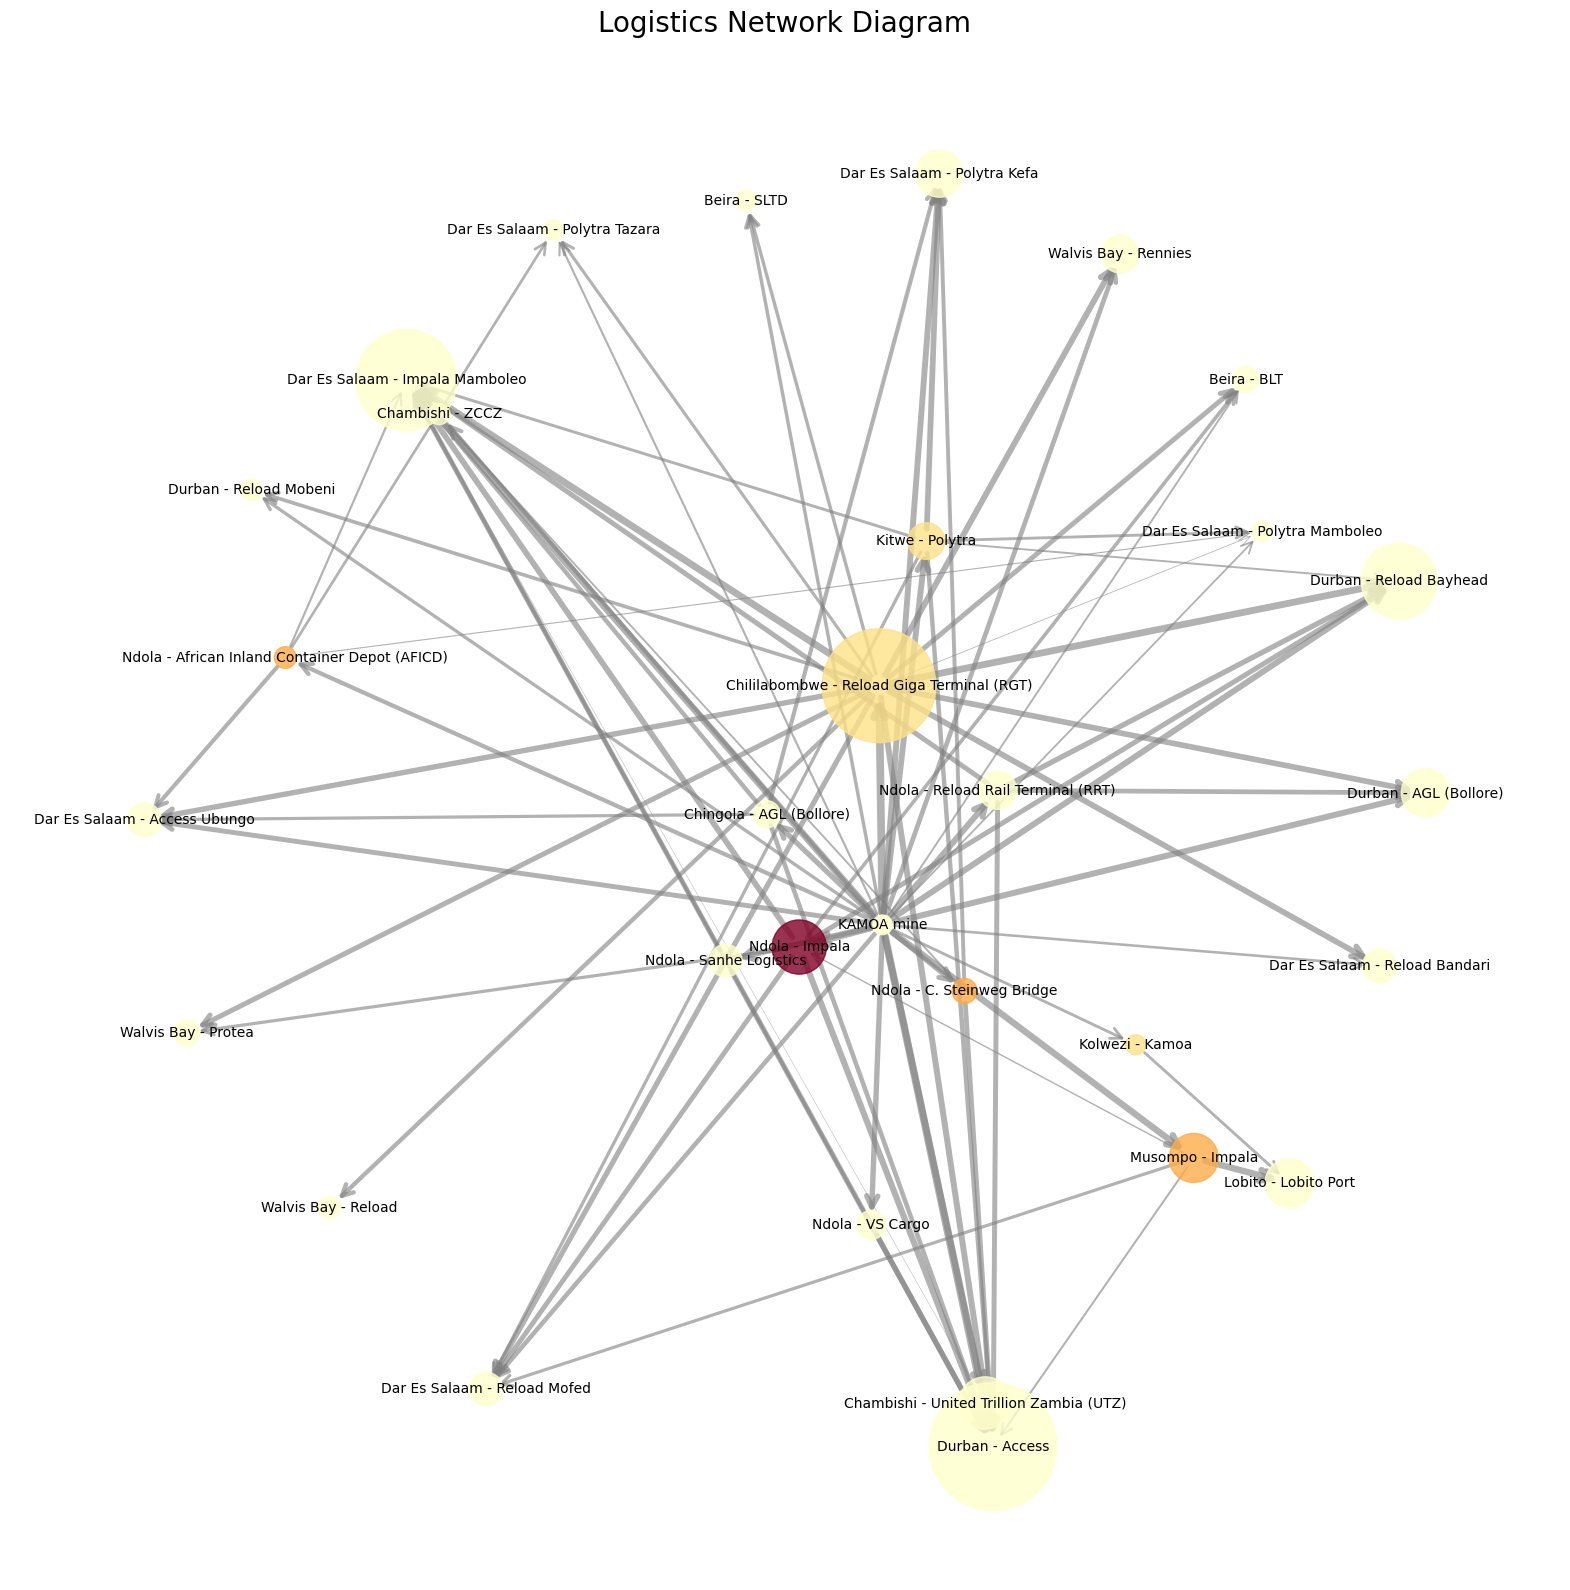

In [11]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import warnings

# Suppress warnings from matplotlib about font caching
warnings.filterwarnings("ignore", category=UserWarning)


# --- 1. Reload and Prepare Data for Graphing ---
# We do this again to ensure the script is self-contained.
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
df = pd.read_excel(file_path)
df['Bags'] = pd.to_numeric(df['Bags'], errors='coerce').fillna(0)


# --- 2. Create the Edge List ---
edge_list = []
for index, row in df.iterrows():
    stops = [
        row['Origin - Mine'],
        row['DRC Transshipment WH'],
        row['Zambia Transshipment WH'],
        row['Load Port Transshipment WH']
    ]
    valid_stops = [stop for stop in stops if pd.notna(stop) and stop != '']
    for i in range(len(valid_stops) - 1):
        edge_list.append({
            'Source': valid_stops[i],
            'Target': valid_stops[i+1],
            'Weight_Bags': row['Bags']
        })
edge_list_df = pd.DataFrame(edge_list)


# --- 3. Create the Network Graph ---
# We create a new graph and aggregate edge weights for visualization
G = nx.DiGraph()
for _, row in edge_list_df.iterrows():
    source, target, weight = row['Source'], row['Target'], row['Weight_Bags']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight
    else:
        G.add_edge(source, target, weight=weight)


# --- 4. Calculate Node Attributes for Visualization ---

# Calculate Throughput (total incoming bags) for node size
throughput = {node: 0 for node in G.nodes()}
for u, v, data in G.edges(data=True):
    throughput[v] += data['weight']

# Calculate Betweenness Centrality (Bottleneck Score) for node color
bottleneck = nx.betweenness_centrality(G, normalized=True, weight='weight')


# --- 5. Draw the Network Diagram ---
plt.figure(figsize=(20, 20))

# Use a layout that spreads nodes out
pos = nx.spring_layout(G, k=0.9, iterations=50)

# Node sizes based on throughput, with a minimum size for visibility
node_sizes = [throughput[node] * 0.1 + 200 for node in G.nodes()]

# Node colors based on bottleneck score
# Higher score = 'hotter' color (red)
node_colors = [bottleneck[node] for node in G.nodes()]

# Edge widths based on the number of bags on that leg
edge_widths = [np.log1p(data['weight']) * 0.5 for u, v, data in G.edges(data=True)]


# Draw the network
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.YlOrRd, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='grey', alpha=0.6, arrowstyle='->', arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title('Logistics Network Diagram', fontsize=20)
plt.axis('off')

# Save the figure
output_filename = 'network_diagram.png'
plt.savefig(output_filename, format='PNG', dpi=300, bbox_inches='tight')

print(f"\n--- Network Diagram Created ---")
print(f"The diagram has been saved as '{output_filename}'.")
print("You can find it in the file explorer panel on the left in Colab and download it.")

In [12]:
import pandas as pd
import numpy as np

# --- 1. Load Your Data ---
file_path = '/Copy of Power BI - Combined Route Analysis.xlsx'
try:
    df = pd.read_excel(file_path)
    print("--- Data Loaded Successfully ---\n")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 2. Data Cleaning ---
# Clean columns needed for this analysis
storage_cols = ['DRC storage', 'Zambia storage', 'Load port storage']
for col in storage_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    else:
        print(f"Warning: Column '{col}' not found.")

# --- 3. In-Depth Storage Duration Analysis ---
print("="*60)
print("--- Analysis 1: Average Storage Days by Warehouse ---")
print("This identifies the specific facilities causing the biggest delays.")
print("="*60 + "\n")

# We will analyze each storage location type (DRC, Zambia, Load Port)
# We only consider entries where storage time is greater than 0

# For DRC Warehouses
drc_storage = df[df['DRC storage'] > 0].groupby('DRC Transshipment WH')['DRC storage'].mean().reset_index()
drc_storage.rename(columns={'DRC Transshipment WH': 'Warehouse', 'DRC storage': 'Avg_Storage_Days'}, inplace=True)
drc_storage['Location_Type'] = 'DRC'

# For Zambia Warehouses
zambia_storage = df[df['Zambia storage'] > 0].groupby('Zambia Transshipment WH')['Zambia storage'].mean().reset_index()
zambia_storage.rename(columns={'Zambia Transshipment WH': 'Warehouse', 'Zambia storage': 'Avg_Storage_Days'}, inplace=True)
zambia_storage['Location_Type'] = 'Zambia'

# For Load Port Warehouses
load_port_storage = df[df['Load port storage'] > 0].groupby('Load Port Transshipment WH')['Load port storage'].mean().reset_index()
load_port_storage.rename(columns={'Load Port Transshipment WH': 'Warehouse', 'Load port storage': 'Avg_Storage_Days'}, inplace=True)
load_port_storage['Location_Type'] = 'Load Port'

# Combine the data
all_storage_df = pd.concat([drc_storage, zambia_storage, load_port_storage], ignore_index=True)

# Sort to find the longest average storage times
storage_time_sorted = all_storage_df.sort_values(by='Avg_Storage_Days', ascending=False)

print(storage_time_sorted)
print("\n\n")


# --- 4. Client Deep-Dive ---
print("="*60)
print("--- Analysis 2: Client Deep-Dive ---")
print("This helps explain why performance differs between clients.")
print("="*60 + "\n")

# For each client, find the most frequently used routes (RouteID)
for client_name in df['Client'].unique():
    print(f"--- Top 5 Most Used RouteIDs for client: {client_name} ---")

    # Filter DataFrame for the current client
    client_df = df[df['Client'] == client_name]

    # Get the value counts of RouteID for this client
    route_usage = client_df['RouteID'].value_counts().reset_index()
    route_usage.columns = ['RouteID', 'Number_of_Transactions']

    print(route_usage.head(5))
    print("\n")


# For each client, find the most frequently used Load Ports
for client_name in df['Client'].unique():
    print(f"--- Top 5 Most Used Load Ports for client: {client_name} ---")

    # Filter DataFrame for the current client
    client_df = df[df['Client'] == client_name]

    # Get the value counts of Load Port for this client
    port_usage = client_df['Load Port Transshipment WH'].value_counts().reset_index()
    port_usage.columns = ['Load Port Warehouse', 'Number_of_Transactions']

    print(port_usage.head(5))
    print("\n")

Error: The file '/Copy of Power BI - Combined Route Analysis.xlsx' was not found.
--- Analysis 1: Average Storage Days by Warehouse ---
This identifies the specific facilities causing the biggest delays.

                                         Warehouse  Avg_Storage_Days Location_Type
18                Dar Es Salaam - Polytra Mamboleo        108.790323     Load Port
21                    Dar Es Salaam - Reload Mofed         77.076279     Load Port
15                   Dar Es Salaam - Access Ubungo         67.936442     Load Port
28                             Walvis Bay - Reload         57.349533     Load Port
13                                     Beira - BLT         47.878314     Load Port
24                         Durban - Reload Bayhead         40.326208     Load Port
14                                    Beira - SLTD         38.642857     Load Port
25                          Durban - Reload Mobeni         37.831590     Load Port
29                            Walvis Bay - Renni

In [13]:
import pandas as pd
import numpy as np

# --- 1. Load Your Data ---
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
try:
    df = pd.read_excel(file_path)
    print("--- Data Loaded Successfully ---\n")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 2. Data Cleaning and Preparation ---
# We need to ensure the 'Month' column is a proper date format
# and clean the other necessary columns.
required_cols = ['Bags', 'Damaged Bags - Load port', 'RouteID', 'Month']
for col in required_cols:
    if col in df.columns:
        if col == 'Month':
            # Convert 'Month' to datetime objects for proper sorting
            df[col] = pd.to_datetime(df[col], errors='coerce')
        elif col in ['Bags', 'Damaged Bags - Load port']:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    else:
        print(f"Warning: A required column '{col}' was not found.")
        exit()

# --- 3. Time-Series Analysis of Route32 ---
print("="*60)
print("--- Analysis 3: Monthly Performance of Route32 ---")
print("This tracks the damage rate over time to spot trends.")
print("="*60 + "\n")

# Filter the DataFrame to only include transactions for 'Route32'
route32_df = df[df['RouteID'] == 'Route32'].copy()

if not route32_df.empty:
    # Use only 'Damaged Bags - Load port' for accuracy
    route32_df['Total Damaged Bags'] = route32_df['Damaged Bags - Load port']

    # Group the data by month and aggregate the performance metrics
    # We use .resample('ME') to group by month end, which is a robust way to handle dates
    monthly_performance = route32_df.set_index('Month').resample('ME').agg(
        Total_Bags=('Bags', 'sum'),
        Total_Damaged_Bags=('Total Damaged Bags', 'sum')
    ).reset_index()

    # Calculate the damage rate for each month
    monthly_performance['Damage_Rate_%'] = np.where(
        monthly_performance['Total_Bags'] > 0,
        (monthly_performance['Total_Damaged_Bags'] / monthly_performance['Total_Bags']) * 100,
        0
    )

    # Filter out months where there were no transactions
    monthly_performance = monthly_performance[monthly_performance['Total_Bags'] > 0]

    print("--- Monthly Damage Rate for Route32 ---")
    print(monthly_performance)

else:
    print("No data found for RouteID 'Route32'. Please check the RouteID.")

--- Data Loaded Successfully ---

--- Analysis 3: Monthly Performance of Route32 ---
This tracks the damage rate over time to spot trends.

--- Monthly Damage Rate for Route32 ---
        Month  Total_Bags  Total_Damaged_Bags  Damage_Rate_%
0  2024-04-30        6972                  37       0.530694
1  2024-05-31         190                   3       1.578947
2  2024-06-30        7961                 128       1.607838
4  2024-08-31        4576                  40       0.874126
5  2024-09-30        5367                  70       1.304267
6  2024-10-31        1023                  57       5.571848
7  2024-11-30        3030                  75       2.475248
8  2024-12-31        4542                 404       8.894760
9  2025-01-31        8380                 275       3.281623
10 2025-02-28        2354                  14       0.594732
11 2025-03-31        2146                  35       1.630941
12 2025-04-30        4417                  53       1.199909


--- Generating Time-Series Plot for Route32 ---

Line chart has been saved as 'route32_damage_trend.png'.
You can find it in the file explorer on the left in Colab.


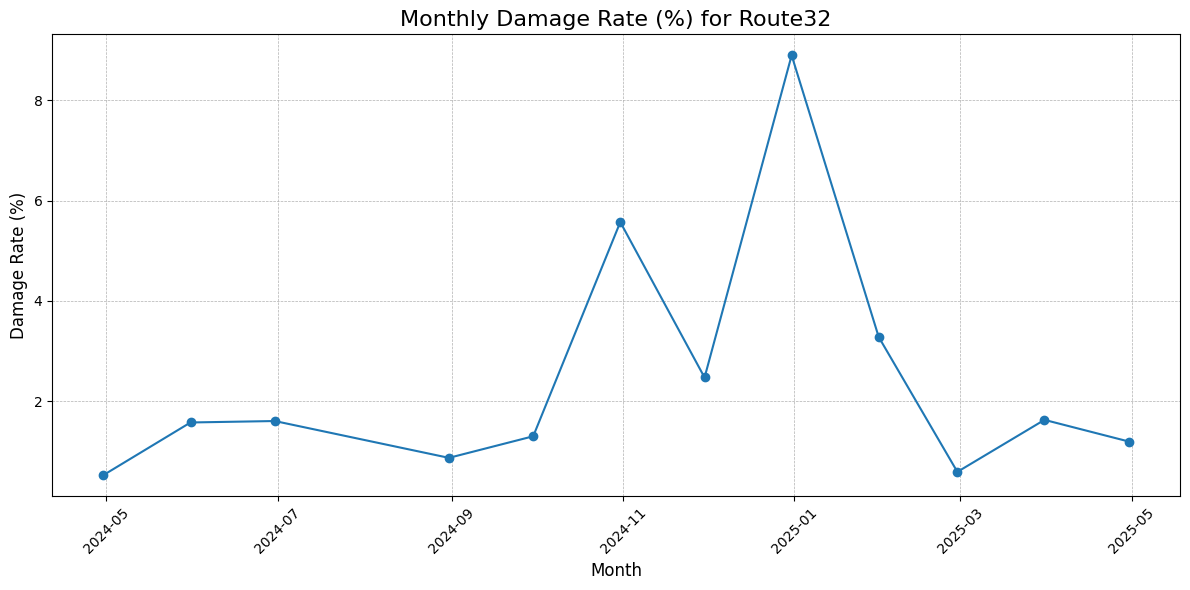

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Recreate the Monthly Performance Data ---
# We do this again to ensure this script can be run independently.
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
df = pd.read_excel(file_path)

# Clean and prepare data
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')
df['Bags'] = pd.to_numeric(df['Bags'], errors='coerce').fillna(0)
df['Damaged Bags - Load port'] = pd.to_numeric(df['Damaged Bags - Load port'], errors='coerce').fillna(0)
route32_df = df[df['RouteID'] == 'Route32'].copy()
route32_df['Total Damaged Bags'] = route32_df['Damaged Bags - Load port']

monthly_performance = route32_df.set_index('Month').resample('ME').agg(
    Total_Bags=('Bags', 'sum'),
    Total_Damaged_Bags=('Total Damaged Bags', 'sum')
).reset_index()

monthly_performance['Damage_Rate_%'] = np.where(
    monthly_performance['Total_Bags'] > 0,
    (monthly_performance['Total_Damaged_Bags'] / monthly_performance['Total_Bags']) * 100,
    0
)
monthly_performance = monthly_performance[monthly_performance['Total_Bags'] > 0]


# --- 2. Create and Save the Line Chart ---
print("="*60)
print("--- Generating Time-Series Plot for Route32 ---")
print("="*60 + "\n")

plt.figure(figsize=(12, 6))
plt.plot(monthly_performance['Month'], monthly_performance['Damage_Rate_%'], marker='o', linestyle='-')

# Adding titles and labels for clarity
plt.title('Monthly Damage Rate (%) for Route32', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Damage Rate (%)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to make room for rotated x-axis labels

# Save the figure
output_filename = 'route32_damage_trend.png'
plt.savefig(output_filename, format='PNG', dpi=300)

print(f"Line chart has been saved as '{output_filename}'.")
print("You can find it in the file explorer on the left in Colab.")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# --- 1. Load and Prepare the Full Dataset ---
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
try:
    df = pd.read_excel(file_path)
    print("--- Data Loaded Successfully ---\n")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 2. Feature Engineering and Target Variable Definition ---
print("="*60)
print("--- Step 1: Preparing Data for Modeling ---")
print("="*60 + "\n")

# Use only the final load port damage for accuracy
df['Total_Damaged_Bags'] = pd.to_numeric(df['Damaged Bags - Load port'], errors='coerce').fillna(0)
df['Bags'] = pd.to_numeric(df['Bags'], errors='coerce').fillna(0)

# Calculate our damage percentage for each transaction
df['Percent_Damaged'] = np.where(df['Bags'] > 0, (df['Total_Damaged_Bags'] / df['Bags']) * 100, 0)

# Define our Target Variable: Is this a high-risk shipment?
# We'll set a threshold. Let's say any shipment with > 5% damage is "High Risk".
damage_threshold = 5.0
df['High_Damage_Risk'] = (df['Percent_Damaged'] > damage_threshold).astype(int) # 1 for High Risk, 0 for Low Risk

print(f"Defined 'High_Damage_Risk' as any transaction with over {damage_threshold}% damage.")
print("Number of High Risk vs. Low Risk transactions:")
print(df['High_Damage_Risk'].value_counts())
print("\n")


# --- 3. Select Features and Prepare for Modeling ---
# We will select the categorical features we want the model to learn from.
features = [
    'Client',
    'RouteID',
    'DRC Transshipment WH',
    'Zambia Transshipment WH',
    'Load Port Transshipment WH'
]

# For simplicity, we'll fill any missing warehouse names with 'N/A'
df[features] = df[features].fillna('N/A')

# Machine learning models need numbers, not text. We use One-Hot Encoding
# to convert our categories (like 'Client A', 'Route32') into numerical format.
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df[features])

# This creates a new DataFrame with our numerical features
X = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(features))
y = df['High_Damage_Risk'] # This is our target

print(f"Selected {len(features)} features for the model.")
print(f"After one-hot encoding, we have {X.shape[1]} numerical features.\n")


# --- 4. Split Data into Training and Testing Sets ---
print("="*60)
print("--- Step 2: Training the Predictive Model ---")
print("="*60 + "\n")

# We split our data: 80% to train the model, 20% to test its performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.\n")


# --- 5. Train the Logistic Regression Model ---
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

print("Model training complete.\n")


# --- 6. Evaluate Model Performance ---
print("="*60)
print("--- Step 3: Evaluating Model Performance ---")
print("="*60 + "\n")

# Make predictions on the unseen test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"The predictive model's accuracy is: {accuracy * 100:.2f}%")
print("\nThis score represents how often the model correctly predicted whether a shipment would be 'High Risk' or 'Low Risk' on the unseen test data.")

In [ ]:
import pandas as pd

# --- 1. Load Your Data ---
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
try:
    df = pd.read_excel(file_path)
    print("--- Data Loaded Successfully ---\n")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 2. Data Cleaning ---
# We only need the warehouse columns for this analysis
warehouse_cols = ['DRC Transshipment WH', 'Zambia Transshipment WH', 'Load Port Transshipment WH']
for col in warehouse_cols:
    if col not in df.columns:
        print(f"Warning: A required column '{col}' was not found.")
        exit()

# --- 3. Complementarity Analysis ---
print("="*60)
print("--- Analysis 1: Complementarity ---")
print("Which Zambia WH is most often paired with each DRC WH?")
print("="*60 + "\n")

# We want to find pairs where both a DRC and a Zambia warehouse exist
complementarity_df = df.dropna(subset=['DRC Transshipment WH', 'Zambia Transshipment WH'])

if not complementarity_df.empty:
    # Group by the DRC WH and then count the occurrences of each paired Zambia WH
    complementarity_counts = complementarity_df.groupby(['DRC Transshipment WH', 'Zambia Transshipment WH']).size().reset_index(name='Transaction_Count')

    # Sort to easily see the most frequent pairings for each DRC warehouse
    sorted_complementarity = complementarity_counts.sort_values(by=['DRC Transshipment WH', 'Transaction_Count'], ascending=[True, False])

    print(sorted_complementarity)
else:
    print("No transactions found that passed through both a DRC and a Zambia warehouse.")

print("\n\n")


# --- 4. Substitution Analysis ---
print("="*60)
print("--- Analysis 2: Substitution ---")
print("From the top Zambia hub, what are the available Load Port substitutes?")
print("="*60 + "\n")

# First, find the most frequently used Zambia Transshipment Warehouse
if not df['Zambia Transshipment WH'].dropna().empty:
    top_zambia_hub = df['Zambia Transshipment WH'].mode()[0]
    print(f"The most frequently used Zambia transit hub is: {top_zambia_hub}\n")

    # Now, filter for all transactions that passed through this top hub
    hub_df = df[df['Zambia Transshipment WH'] == top_zambia_hub].copy()

    # Find all the unique Load Ports connected to this hub and count their usage
    substitution_options = hub_df['Load Port Transshipment WH'].value_counts().reset_index()
    substitution_options.columns = ['Substitute_Load_Port', 'Number_of_Transactions']

    print(f"--- Substitution Options from '{top_zambia_hub}' ---")
    print(substitution_options)
else:
    print("No data available for Zambia Transshipment Warehouses.")

In [ ]:
import pandas as pd

# --- 1. Load Your Data ---
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
try:
    df = pd.read_excel(file_path)
    print("--- Data Loaded Successfully ---\n")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 2. Data Cleaning ---
warehouse_cols = ['Zambia Transshipment WH', 'Load Port Transshipment WH', 'Routes']
for col in warehouse_cols:
    if col not in df.columns:
        print(f"Warning: A required column '{col}' was not found.")
        exit()
# We drop rows where essential information is missing for this analysis
df_cleaned = df.dropna(subset=warehouse_cols)


# --- 3. Country-by-Country Substitution Analysis ---
print("="*60)
print("--- Analysis 4: Substitution Options per Country ---")
print("="*60 + "\n")

# Get a list of unique destination countries
countries = df_cleaned['Routes'].unique()

# Loop through each country to perform the analysis
for country in countries:
    print(f"--- Analyzing Destination Country: {country} ---")

    # Filter the DataFrame for just the current country
    country_df = df_cleaned[df_cleaned['Routes'] == country]

    if country_df.empty:
        print(f"No complete data for {country}.\n")
        continue

    # Find the most common Zambia hub used to reach this country
    if not country_df['Zambia Transshipment WH'].empty:
        top_zambia_hub = country_df['Zambia Transshipment WH'].mode()
        if not top_zambia_hub.empty:
            top_zambia_hub = top_zambia_hub[0]
            print(f"Primary Zambia Hub Used: {top_zambia_hub}")

            # Filter for transactions from that specific hub to the specific country
            hub_and_country_df = country_df[country_df['Zambia Transshipment WH'] == top_zambia_hub]

            # Get the value counts of the load ports (the substitutes)
            substitution_options = hub_and_country_df['Load Port Transshipment WH'].value_counts().reset_index()
            substitution_options.columns = ['Substitute_Load_Port', 'Number_of_Transactions']

            print(f"Substitution Options in '{country}' from '{top_zambia_hub}':")
            print(substitution_options)
            print("\n" + "-"*50 + "\n")
        else:
            print("No dominant Zambia hub found for this country.\n")
    else:
        print("No Zambia hub data available for this country.\n")

In [ ]:
import pandas as pd
import networkx as nx

# --- 1. Load and Prepare Data ---
# This section loads the data and prepares it for all subsequent analyses.
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
try:
    df = pd.read_excel(file_path)
    print("--- Data Loaded Successfully ---\n")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# Clean warehouse columns and drop rows where essential data is missing for strategic analysis
warehouse_cols = ['DRC Transshipment WH', 'Zambia Transshipment WH', 'Load Port Transshipment WH', 'Routes']
df_cleaned = df.dropna(subset=warehouse_cols).copy()


# --- 2. Analysis 1: Centrality (Bottleneck Score) ---
# This section identifies the most critical 'bridge' warehouses in the entire network.
print("="*60)
print("--- Analysis 1: Centrality (Bottleneck Score) ---")
print("Identifies the most critical 'bridge' warehouses in the network.")
print("="*60 + "\n")

# Create the edge list from the full, original dataframe to capture all connections
edge_list = []
for index, row in df.iterrows():
    stops = [
        row['Origin - Mine'],
        row['DRC Transshipment WH'],
        row['Zambia Transshipment WH'],
        row['Load Port Transshipment WH']
    ]
    valid_stops = [stop for stop in stops if pd.notna(stop) and stop != '']
    for i in range(len(valid_stops) - 1):
        edge_list.append({'Source': valid_stops[i], 'Target': valid_stops[i+1]})
edge_list_df = pd.DataFrame(edge_list)

# Create the graph and calculate betweenness centrality
G = nx.from_pandas_edgelist(edge_list_df, source='Source', target='Target', create_using=nx.DiGraph())
bottleneck_score = nx.betweenness_centrality(G, normalized=True)
bottleneck_df = pd.DataFrame(list(bottleneck_score.items()), columns=['Warehouse', 'Bottleneck_Score'])
bottleneck_df_sorted = bottleneck_df.sort_values(by='Bottleneck_Score', ascending=False)

# We only display nodes that have a non-zero score, as they are the true bottlenecks
print(bottleneck_df_sorted[bottleneck_df_sorted['Bottleneck_Score'] > 0])
print("\n\n")


# --- 3. Analysis 2: Expanded Complementarity ---
# This section finds which warehouses are most frequently used together in direct sequence.
print("="*60)
print("--- Analysis 2: Expanded Complementarity ---")
print("Shows which warehouses are most frequently used together in sequence.")
print("="*60 + "\n")

# Pairing 1: DRC -> Zambia
drc_zambia_pairs = df_cleaned.groupby(['DRC Transshipment WH', 'Zambia Transshipment WH']).size().reset_index(name='Transaction_Count')
drc_zambia_sorted = drc_zambia_pairs.sort_values(by='Transaction_Count', ascending=False)
print("--- DRC -> Zambia Warehouse Pairings ---")
print(drc_zambia_sorted)
print("\n")

# Pairing 2: Zambia -> Load Port
zambia_port_pairs = df_cleaned.groupby(['Zambia Transshipment WH', 'Load Port Transshipment WH']).size().reset_index(name='Transaction_Count')
zambia_port_sorted = zambia_port_pairs.sort_values(by='Transaction_Count', ascending=False)
print("--- Top 10 Zambia -> Load Port Warehouse Pairings ---")
print(zambia_port_sorted.head(10)) # Showing top 10 for clarity
print("\n\n")


# --- 4. Analysis 3: Country-Constrained Substitution ---
# This section provides a strategic playbook of practical, in-country substitutes for each destination.
print("="*60)
print("--- Analysis 3: Country-Constrained Substitution ---")
print("Finds practical substitute ports within the same country.")
print("="*60 + "\n")

# Get a list of unique destination countries
countries = df_cleaned['Routes'].unique()

# Loop through each country
for country in countries:
    country_df = df_cleaned[df_cleaned['Routes'] == country]
    if country_df.empty:
        continue

    # Find the most common Zambia hub used to reach this country
    if not country_df['Zambia Transshipment WH'].empty:
        top_zambia_hub_series = country_df['Zambia Transshipment WH'].mode()
        if not top_zambia_hub_series.empty:
            top_zambia_hub = top_zambia_hub_series[0]

            # Filter for transactions from that specific hub to the specific country
            hub_and_country_df = country_df[country_df['Zambia Transshipment WH'] == top_zambia_hub]

            if not hub_and_country_df.empty:
                # Get the value counts of the load ports (the substitutes)
                substitution_options = hub_and_country_df['Load Port Transshipment WH'].value_counts().reset_index()
                substitution_options.columns = ['Substitute_Load_Port', 'Number_of_Transactions']

                print(f"--- For Destination Country: {country} (via {top_zambia_hub}) ---")
                print(substitution_options)
                print("\n" + "-"*50 + "\n")

In [ ]:
import pandas as pd

# --- 1. Load Your Data ---
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
try:
    df = pd.read_excel(file_path)
    print("--- Data Loaded Successfully ---\n")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 2. Client-Specific Warehouse Analysis ---
print("="*60)
print("--- Analysis: Client-Specific Warehouse Usage ---")
print("="*60 + "\n")

# Define clients and warehouse types
clients = ['Trafigura', 'Zijin']
warehouse_types = {
    'DRC Warehouses': 'DRC Transshipment WH',
    'Zambia Warehouses': 'Zambia Transshipment WH',
    'Load Port Warehouses': 'Load Port Transshipment WH'
}

# --- Get warehouse sets for each client ---
# This creates a dictionary to hold the set of warehouses used by each client
client_warehouses = {client: {} for client in clients}

for client_name in clients:
    client_df = df[df['Client'] == client_name]
    for wh_type, wh_col in warehouse_types.items():
        # Get the unique, non-null warehouses for this client and type
        unique_warehouses = set(client_df[wh_col].dropna().unique())
        client_warehouses[client_name][wh_type] = unique_warehouses

# --- Compare sets to find exclusive and shared warehouses ---
for wh_type in warehouse_types.keys():
    print(f"--- {wh_type} ---")

    # Get the sets for each client for the current warehouse type
    trafigura_set = client_warehouses['Trafigura'][wh_type]
    zijin_set = client_warehouses['Zijin'][wh_type]

    # Perform set operations to find differences and intersections
    only_trafigura = trafigura_set - zijin_set
    only_zijin = zijin_set - trafigura_set
    used_by_both = trafigura_set.intersection(zijin_set)

    # Print the results
    print(f"Warehouses used ONLY by Trafigura: {list(only_trafigura) if only_trafigura else 'None'}")
    print(f"Warehouses used ONLY by Zijin: {list(only_zijin) if only_zijin else 'None'}")
    print(f"Warehouses used by BOTH clients: {list(used_by_both) if used_by_both else 'None'}")
    print("\n" + "-"*50 + "\n")

In [ ]:
import pandas as pd

# --- 1. Load Your Data ---
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
try:
    df = pd.read_excel(file_path)
    print("--- Data Loaded Successfully ---\n")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 2. Re-run Logic to Get Client-Specific Warehouse Sets ---
clients = ['Trafigura', 'Zijin']
warehouse_types = {
    'DRC Warehouse': 'DRC Transshipment WH',
    'Zambia Warehouse': 'Zambia Transshipment WH',
    'Load Port Warehouse': 'Load Port Transshipment WH'
}
client_warehouses = {client: {} for client in clients}

for client_name in clients:
    client_df = df[df['Client'] == client_name]
    for wh_type, wh_col in warehouse_types.items():
        unique_warehouses = set(client_df[wh_col].dropna().unique())
        client_warehouses[client_name][wh_type] = unique_warehouses


# --- 3. Create the Consolidated Table ---
# This section transforms the previous analysis into the requested table format
report_data = []

for wh_type, wh_col_name in warehouse_types.items():
    trafigura_set = client_warehouses['Trafigura'][wh_type]
    zijin_set = client_warehouses['Zijin'][wh_type]

    only_trafigura = trafigura_set - zijin_set
    only_zijin = zijin_set - trafigura_set
    used_by_both = trafigura_set.intersection(zijin_set)

    for warehouse in only_trafigura:
        report_data.append({'Warehouse': warehouse, 'Type': wh_type, 'Client_Usage': 'Trafigura Only'})
    for warehouse in only_zijin:
        report_data.append({'Warehouse': warehouse, 'Type': wh_type, 'Client_Usage': 'Zijin Only'})
    for warehouse in used_by_both:
        report_data.append({'Warehouse': warehouse, 'Type': wh_type, 'Client_Usage': 'Both'})

# Convert the list of dictionaries into a DataFrame and sort for readability
report_df = pd.DataFrame(report_data)
report_df_sorted = report_df.sort_values(by=['Type', 'Client_Usage', 'Warehouse']).reset_index(drop=True)


# --- 4. Display the Final Report Table ---
print("="*60)
print("--- Consolidated Table of Warehouse Usage by Client ---")
print("="*60 + "\n")

# Set display options to show the full table
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print(report_df_sorted)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # <-- We've changed the model here
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# --- 1. Load and Prepare the Full Dataset ---
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
try:
    df = pd.read_excel(file_path)
    print("--- Data Loaded Successfully ---\n")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 2. Feature Engineering and Target Variable Definition ---
print("="*60)
print("--- Step 1: Preparing Data for Modeling ---")
print("="*60 + "\n")

df['Total_Damaged_Bags'] = pd.to_numeric(df['Damaged Bags - Load port'], errors='coerce').fillna(0)
df['Bags'] = pd.to_numeric(df['Bags'], errors='coerce').fillna(0)
df['Percent_Damaged'] = np.where(df['Bags'] > 0, (df['Total_Damaged_Bags'] / df['Bags']) * 100, 0)

# Define our Target Variable: Is this a high-risk shipment?
damage_threshold = 5.0
df['High_Damage_Risk'] = (df['Percent_Damaged'] > damage_threshold).astype(int)

# Select Features and Prepare for Modeling
features = [
    'Client',
    'RouteID',
    'DRC Transshipment WH',
    'Zambia Transshipment WH',
    'Load Port Transshipment WH'
]
df[features] = df[features].fillna('N/A')

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df[features])
X = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(features))
y = df['High_Damage_Risk']


# --- 4. Split Data into Training and Testing Sets ---
print("="*60)
print("--- Step 2: Training the More Powerful Predictive Model ---")
print("="*60 + "\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.\n")


# --- 5. Train the Random Forest Model ---
# We are now using the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
print("Random Forest model training complete.\n")


# --- 6. Evaluate Model Performance ---
print("="*60)
print("--- Step 3: Evaluating Random Forest Performance ---")
print("="*60 + "\n")

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"The Random Forest model's accuracy is: {accuracy * 100:.2f}%")
print(f"(Our previous Logistic Regression model had an accuracy of 61.82%)")

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# --- 1. Load and Prepare Data ---
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
df = pd.read_excel(file_path)
df['Bags'] = pd.to_numeric(df['Bags'], errors='coerce').fillna(0)

# --- 2. Create the Full Edge List ---
edge_list = []
for index, row in df.iterrows():
    stops = [
        row['Origin - Mine'],
        row['DRC Transshipment WH'],
        row['Zambia Transshipment WH'],
        row['Load Port Transshipment WH']
    ]
    valid_stops = [stop for stop in stops if pd.notna(stop) and stop != '']
    for i in range(len(valid_stops) - 1):
        edge_list.append({
            'Source': valid_stops[i],
            'Target': valid_stops[i+1],
            'Weight_Bags': row['Bags']
        })
edge_list_df = pd.DataFrame(edge_list)

# Aggregate edge weights
G = nx.DiGraph()
for _, row in edge_list_df.iterrows():
    source, target, weight = row['Source'], row['Target'], row['Weight_Bags']
    if G.has_edge(source, target):
        G[source][target]['weight'] += weight
    else:
        G.add_edge(source, target, weight=weight)

# --- 3. Create the Simplified "Superhighways" Graph ---
# We set a threshold to only show edges with high volume
# You can adjust this threshold to show more or fewer connections
volume_threshold = 1000  # Only show connections with more than 1000 bags

H = nx.DiGraph()
for u, v, data in G.edges(data=True):
    if data['weight'] > volume_threshold:
        H.add_edge(u, v, weight=data['weight'])

# --- 4. Draw the Simplified Diagram ---
if H.number_of_edges() > 0:
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(H, k=1.5, iterations=50)
    edge_widths = [np.log1p(data['weight']) * 0.5 for u, v, data in H.edges(data=True)]

    nx.draw_networkx_nodes(H, pos, node_size=2000, node_color='skyblue', alpha=0.8)
    nx.draw_networkx_edges(H, pos, width=edge_widths, edge_color='grey', alpha=0.7, arrowstyle='->', arrowsize=20)
    nx.draw_networkx_labels(H, pos, font_size=10)

    plt.title('Network "Superhighways" Diagram (High-Volume Routes)', fontsize=18)
    plt.axis('off')
    plt.savefig('superhighways_diagram.png', format='PNG', dpi=300, bbox_inches='tight')
    print("--- \"Superhighways\" diagram created and saved as superhighways_diagram.png ---")
else:
    print("No routes met the volume threshold. Try lowering the 'volume_threshold' value.")

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# --- 1. Load and Prepare Data ---
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
df = pd.read_excel(file_path)
df.dropna(subset=['Routes', 'Zambia Transshipment WH'], inplace=True) # Focus on routes with a Zambia hub

# --- 2. Create Country-Level Edge List ---
# The source is always the Zambia Hub Country (Zambia), the target is the destination country.
country_edges = df.groupby('Routes').agg(
    Total_Bags=('Bags', 'sum')
).reset_index()
country_edges.rename(columns={'Routes': 'Target_Country', 'Total_Bags': 'weight'}, inplace=True)
country_edges['Source_Country'] = 'Zambia (Transit)'

# --- 3. Create and Draw the Country-Level Graph ---
G_country = nx.from_pandas_edgelist(country_edges,
                                    source='Source_Country',
                                    target='Target_Country',
                                    edge_attr='weight',
                                    create_using=nx.DiGraph())

if G_country.number_of_edges() > 0:
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G_country, k=2)

    node_sizes = [G_country.degree(node) * 4000 for node in G_country.nodes()]
    edge_widths = [np.log1p(data['weight']) for u, v, data in G_country.edges(data=True)]

    nx.draw_networkx_nodes(G_country, pos, node_size=node_sizes, node_color='lightgreen', alpha=0.9)
    nx.draw_networkx_edges(G_country, pos, width=edge_widths, edge_color='black', alpha=0.7, arrowstyle='->', arrowsize=30)
    nx.draw_networkx_labels(G_country, pos, font_size=12, font_weight='bold')

    plt.title('High-Level Strategic View: Country-to-Country Flow', fontsize=18)
    plt.axis('off')
    plt.savefig('country_flow_diagram.png', format='PNG', dpi=300, bbox_inches='tight')
    print("--- Country-level diagram created and saved as country_flow_diagram.png ---")
else:
    print("Could not generate the country-level diagram.")

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# --- 1. Load Data ---
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
df = pd.read_excel(file_path)

# --- 2. Filter for a Specific Route (e.g., Route32) ---
route_to_visualize = 'Route32'
route_df = df[df['RouteID'] == route_to_visualize].copy()

# --- 3. Create Edge List for Only This Route ---
if not route_df.empty:
    route_edges = []
    for index, row in route_df.iterrows():
        stops = [
            row['Origin - Mine'],
            row['DRC Transshipment WH'],
            row['Zambia Transshipment WH'],
            row['Load Port Transshipment WH']
        ]
        valid_stops = [stop for stop in stops if pd.notna(stop) and stop != '']
        for i in range(len(valid_stops) - 1):
            route_edges.append({'Source': valid_stops[i], 'Target': valid_stops[i+1]})

    # --- 4. Create and Draw the Focused Graph ---
    G_route = nx.from_pandas_edgelist(pd.DataFrame(route_edges), 'Source', 'Target', create_using=nx.DiGraph())

    if G_route.number_of_nodes() > 0:
        plt.figure(figsize=(10, 6))
        pos = nx.spring_layout(G_route)

        nx.draw_networkx_nodes(G_route, pos, node_size=2500, node_color='gold', alpha=0.9)
        nx.draw_networkx_edges(G_route, pos, width=2, edge_color='gray', arrowstyle='->', arrowsize=25)
        nx.draw_networkx_labels(G_route, pos, font_size=11)

        plt.title(f'Focused View: Path for {route_to_visualize}', fontsize=16)
        plt.axis('off')
        plt.savefig(f'{route_to_visualize}_path_diagram.png', format='PNG', dpi=300, bbox_inches='tight')
        print(f"--- Diagram for {route_to_visualize} created and saved as {route_to_visualize}_path_diagram.png ---")
    else:
        print(f"Could not generate a diagram for {route_to_visualize}. No valid paths found.")
else:
    print(f"No data found for RouteID '{route_to_visualize}'.")

In [ ]:
import pandas as pd

# --- 1. Load Your Data ---
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
try:
    df = pd.read_excel(file_path)
    print("--- Data Loaded Successfully ---\n")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 2. Transportation Options Analysis ---
# We will find all available transit paths for a specific destination.

# Define our target destination. Let's use your busiest port.
target_load_port = 'Durban - Access'

print("="*60)
print(f"--- Analysis: Available Transit Options for '{target_load_port}' ---")
print("="*60 + "\n")

# Filter the DataFrame to only include transactions going to our target port
target_df = df[df['Load Port Transshipment WH'] == target_load_port].copy()

if not target_df.empty:
    # Define the path columns we are interested in
    path_cols = ['DRC Transshipment WH', 'Zambia Transshipment WH']

    # Fill any missing values with a clear label like 'Direct / Not Used'
    # This makes it easy to see paths that skip a transit country
    target_df[path_cols] = target_df[path_cols].fillna('Direct / Not Used')

    # Count the occurrences of each unique path combination
    transportation_options = target_df.groupby(path_cols).size().reset_index(name='Number_of_Times_Used')

    # Sort by the most frequently used options
    sorted_options = transportation_options.sort_values(by='Number_of_Times_Used', ascending=False)

    print(f"The following transit combinations have been used to reach '{target_load_port}':\n")
    print(sorted_options)

else:
    print(f"No data found for the destination: '{target_load_port}'")

In [ ]:
import pandas as pd

# --- 1. Load Your Data ---
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
try:
    df = pd.read_excel(file_path)
    print("--- Data Loaded Successfully ---\n")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 2. Comprehensive Transportation Options Analysis ---
# We will find all available transit paths for EVERY load port warehouse.

# Get a list of all unique destination ports
all_load_ports = df['Load Port Transshipment WH'].dropna().unique()

# Loop through each destination port to perform the analysis
for port in all_load_ports:

    print("="*60)
    print(f"--- Analysis for Destination: '{port}' ---")
    print("="*60 + "\n")

    # Filter the DataFrame for the current port
    target_df = df[df['Load Port Transshipment WH'] == port].copy()

    if not target_df.empty:
        # Define the path columns
        path_cols = ['DRC Transshipment WH', 'Zambia Transshipment WH']

        # Fill missing values with a clear label
        target_df[path_cols] = target_df[path_cols].fillna('Direct / Not Used')

        # Count the occurrences of each unique path combination
        transportation_options = target_df.groupby(path_cols).size().reset_index(name='Number_of_Times_Used')

        # Sort by the most frequently used options
        sorted_options = transportation_options.sort_values(by='Number_of_Times_Used', ascending=False)

        print(f"The following transit combinations have been used to reach '{port}':\n")
        print(sorted_options)
        print("\n\n")

    else:
        # This case should not happen with our loop logic, but it's good practice
        print(f"No data found for the destination: '{port}'\n\n")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # <-- We're using a Regressor now
from sklearn.metrics import mean_absolute_error   # <-- A new evaluation metric
from sklearn.preprocessing import OneHotEncoder

# --- 1. Load and Prepare the Full Dataset ---
file_path = '/content/Copy of Power BI - Combined Route Analysis.xlsx'
try:
    df = pd.read_excel(file_path)
    print("--- Data Loaded Successfully ---\n")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 2. Feature Engineering and Target Variable Definition ---
print("="*60)
print("--- Step 1: Preparing Data for Regression Modeling ---")
print("="*60 + "\n")

# Clean storage columns and calculate the total storage time
storage_cols = ['DRC storage', 'Zambia storage', 'Load port storage']
for col in storage_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
df['Total_Storage_Time'] = df['DRC storage'] + df['Zambia storage'] + df['Load port storage']


# Define our Target Variable: The number we want to predict
y = df['Total_Storage_Time']
print(f"Target variable is 'Total_Storage_Time', with an average of {y.mean():.2f} days.\n")


# --- 3. Select Features and Prepare for Modeling ---
# We will use the same categorical features as before
features = [
    'Client',
    'RouteID',
    'DRC Transshipment WH',
    'Zambia Transshipment WH',
    'Load Port Transshipment WH'
]
df[features] = df[features].fillna('N/A')

# Convert text categories into numerical format using One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df[features])
X = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(features))

print(f"Selected {len(features)} features for the model.")
print(f"After encoding, we have {X.shape[1]} numerical features.\n")


# --- 4. Split Data into Training and Testing Sets ---
print("="*60)
print("--- Step 2: Training the Predictive Model ---")
print("="*60 + "\n")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.\n")


# --- 5. Train the Random Forest Regressor Model ---
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("Regression model training complete.\n")


# --- 6. Evaluate Model Performance ---
print("="*60)
print("--- Step 3: Evaluating Model Performance ---")
print("="*60 + "\n")

# Make predictions on the unseen test data
y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print(f"The model's Mean Absolute Error (MAE) is: {mae:.2f} days")
print("\nThis means that, on average, the model's prediction for the total storage time is off by about " + f"{mae:.2f} days (either higher or lower).")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# --- 1. Load Both Datasets ---
try:
    df_train = pd.read_excel('/content/Data for ML.xlsx')
    df_test = pd.read_excel('/content/Copy of Power BI - Combined Route Analysis.xlsx')
    print("--- Both training and testing datasets loaded successfully ---\n")
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    exit()

# --- 2. Custom Feature Engineering Function ---
# This function now handles the different data structures.
def prepare_data(df, file_type='power_bi'):
    if file_type == 'training_ml':
        # Logic for the 'Data for ML' file using your date calculations
        print("Processing training data: Calculating storage days from date columns...")
        date_cols = ['Date.1', 'Date.2', 'Date.3', 'Date.4', 'Date.5', 'Date.6']
        for col in date_cols:
            df[col] = pd.to_datetime(df[col], errors='coerce')

        # Calculate storage days. The .dt.days extracts the number of days.
        df['DRC storage'] = (df['Date.2'] - df['Date.1']).dt.days
        df['Zambia storage'] = (df['Date.4'] - df['Date.3']).dt.days
        df['Load port storage'] = (df['Date.6'] - df['Date.5']).dt.days

        # Replace any calculation errors (from missing dates) with 0
        storage_cols = ['DRC storage', 'Zambia storage', 'Load port storage']
        for col in storage_cols:
            df[col] = df[col].fillna(0)
    else:
        # Original logic for the 'Power BI' file
        print("Processing testing data: Using existing storage day columns...")
        storage_cols = ['DRC storage', 'Zambia storage', 'Load port storage']
        for col in storage_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

    df['Total_Storage_Time'] = df['DRC storage'] + df['Zambia storage'] + df['Load port storage']
    return df

# Apply the correct preparation to each dataframe
df_train = prepare_data(df_train, file_type='training_ml')
df_test = prepare_data(df_test, file_type='power_bi')
print("\n--- Feature engineering complete for both datasets ---\n")


# --- 3. Prepare Features for Consistent Encoding ---
features = [
    'Client',
    'RouteID',
    'DRC Transshipment WH',
    'Zambia Transshipment WH',
    'Load Port Transshipment WH'
]
df_train[features] = df_train[features].fillna('N/A')
df_test[features] = df_test[features].fillna('N/A')

# Fit the encoder on all possible categories from both datasets
combined_categories = pd.concat([df_train[features], df_test[features]], ignore_index=True)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(combined_categories)

# --- 4. Prepare Final Training and Testing Sets ---
X_train_encoded = encoder.transform(df_train[features])
X_test_encoded = encoder.transform(df_test[features])
y_train = df_train['Total_Storage_Time']
y_test = df_test['Total_Storage_Time']

print(f"Training on {len(X_train_encoded)} samples from 'Data for ML'.")
print(f"Testing on {len(X_test_encoded)} samples from 'Copy of Power BI'.\n")

# --- 5. Train the Random Forest Regressor Model ---
print("="*60)
print("--- Training the Predictive Model ---")
print("="*60 + "\n")
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_encoded, y_train)
print("Regression model training complete.\n")

# --- 6. Evaluate Model Performance on the SEPARATE Test Set ---
print("="*60)
print("--- Evaluating Model Performance on the Test Dataset ---")
print("="*60 + "\n")
y_pred = model.predict(X_test_encoded)
mae = mean_absolute_error(y_test, y_pred)

print(f"The model's Mean Absolute Error (MAE) on the separate test set is: {mae:.2f} days")

In [ ]:
!pip install xlsxwriter

In [ ]:
import pandas as pd
import numpy as np

# --- 1. Load the Bag-Level Data ---
file_path = '/content/Combined logistic view Jan 24 - May 25 for PBI.xlsx'
try:
    df = pd.read_excel(file_path) # Simplified the loading function
    print("--- Bag-level data loaded successfully ---\n")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 2. Define the Unique Route Path ---
# A route's physical path is defined by the warehouses it passes through.
path_cols = [
    'DRC Transshipment WH',
    'Zambia Transshipment WH',
    'Load Port Transshipment WH'
]
df[path_cols] = df[path_cols].fillna('N/A')

# Create the unique 'RoutePath' ID by joining the warehouse names
df['RoutePath'] = df[path_cols].astype(str).agg(' -> '.join, axis=1)
print("--- Unique 'RoutePath' identifier created ---\n")


# --- 3. Group by Route Path AND Month, then Aggregate ---
# This is the key step that implements your logic.
aggregation_rules = {
    'Client': ('Client', 'first'),
    'Routes': ('Country.5', 'first'), # The Country column
    'Origin - Mine': ('Origin Mine', 'first'),
    'DRC Transshipment WH': ('DRC Transshipment WH', 'first'),
    'Zambia Transshipment WH': ('Zambia Transshipment WH', 'first'),
    'Load Port Transshipment WH': ('Load Port Transshipment WH', 'first'),
    'Bags': ('RoutePath', 'size'), # 'size' counts all rows (bags) in the group
    'Date_1': ('Date.1', 'first'),
    'Date_2': ('Date.2', 'first'),
    'Date_3': ('Date.3', 'first'),
    'Date_4': ('Date.4', 'first'),
    'Date_5': ('Date.5', 'first'),
    'Date_6': ('Date.6', 'first'),
}

# --- CORRECTED LINE ---
# Group by both the path and the confirmed 'Report Month' column
monthly_route_df = df.groupby(['RoutePath', 'Report Month']).agg(**aggregation_rules).reset_index()
print("--- Bag-level data has been aggregated to a monthly route-level ---\n")


# --- 4. Calculate Storage Durations on the New Table ---
# Convert date columns back to datetime objects for calculation
date_cols_agg = ['Date_1', 'Date_2', 'Date_3', 'Date_4', 'Date_5', 'Date_6']
for col in date_cols_agg:
    monthly_route_df[col] = pd.to_datetime(monthly_route_df[col], errors='coerce')

# Calculate storage days
monthly_route_df['DRC Storage'] = (monthly_route_df['Date_2'] - monthly_route_df['Date_1']).dt.days
monthly_route_df['Zambia Storage'] = (monthly_route_df['Date_4'] - monthly_route_df['Date_3']).dt.days
monthly_route_df['Load Port Storage'] = (monthly_route_df['Date_6'] - monthly_route_df['Date_5']).dt.days

# Clean up final storage columns
for col in ['DRC Storage', 'Zambia Storage', 'Load Port Storage']:
    monthly_route_df[col] = monthly_route_df[col].apply(lambda x: x if x > 0 else 0).fillna(0)


# --- 5. Finalize the Table and Save to Excel ---
# Rename 'Report Month' to 'Month' for clarity
monthly_route_df.rename(columns={'Report Month': 'Month'}, inplace=True)

# Select and order the final columns
final_columns = [
    'Month', 'Routes', 'Client', 'Origin - Mine',
    'DRC Transshipment WH', 'Zambia Transshipment WH', 'Load Port Transshipment WH',
    'Bags',
    'DRC Storage', 'Zambia Storage', 'Load Port Storage'
]
final_df = monthly_route_df[[col for col in final_columns if col in monthly_route_df.columns]]

# Save to a formatted Excel file
output_filename = 'monthly_route_level_data.xlsx'
writer = pd.ExcelWriter(output_filename, engine='xlsxwriter')
final_df.to_excel(writer, sheet_name='MonthlyRouteData', index=False)
workbook  = writer.book
worksheet = writer.sheets['MonthlyRouteData']
(max_row, max_col) = final_df.shape
worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': [{'header': column} for column in final_df.columns]})
worksheet.autofit()
writer.close()

print("="*60)
print("--- Success! ---")
print(f"The aggregated, monthly route-level data has been saved as '{output_filename}'.")
print("="*60 + "\n")
print("--- Preview of the new route-level data ---")
print(final_df.head())

In [ ]:
import pandas as pd

# --- Load the Data ---
file_path = '/content/Data for ML.xlsx'
try:

    df = pd.read_excel(file_path)
    print("--- Data Loaded Successfully ---\n")

     # --- Print all column names ---
    print("="*60)
    print("--- List of all columns in your data file ---")
    print("="*60 + "\n")
    # We print them as a list to see them clearly
    print(list(df.columns))

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# --- 1. Load Both Datasets ---
try:
    # We use the clean, aggregated data we created as our training set
    df_train = pd.read_excel('monthly_route_level_data.xlsx')
    # The Power BI data is our test set
    df_test = pd.read_excel('Copy of Power BI - Combined Route Analysis.xlsx')
    print("--- Both training and testing datasets loaded successfully ---\n")
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    exit()
except Exception as e:
    print(f"An error occurred: {e}")
    exit()

# --- 2. Standardize Column Names ---
# This is the key step to prevent all errors. We create a consistent structure first.

# For the training set (from 'monthly_route_level_data.xlsx')
df_train.rename(columns={
    'Month': 'Standard_Month',
    'DRC Storage': 'DRC_Storage',
    'Zambia Storage': 'Zambia_Storage',
    'Load Port Storage': 'Load_Port_Storage'
}, inplace=True)

# For the testing set (from 'Copy of Power BI ... .xlsx'), we handle its unique names
df_test.rename(columns={
    'Month' if 'Month' in df_test.columns else 'Report Month': 'Standard_Month',
    'DRC storage': 'DRC_Storage',
    'Zambia storage': 'Zambia_Storage',
    'Load port storage': 'Load_Port_Storage'
}, inplace=True)

print("--- Column names have been standardized across both datasets ---\n")

# --- 3. Define a Function to Transform Data to Warehouse-Level ---
# This function now correctly expects standardized column names.
def transform_to_warehouse_level(df):
    # Ensure the month column is converted correctly before processing
    if 'Standard_Month' in df.columns:
        df['Standard_Month'] = pd.to_datetime(df['Standard_Month']).dt.to_period('M')
    else:
        # Handle case where the column might not exist after renaming
        print("Warning: 'Standard_Month' column not found.")
        return pd.DataFrame() # Return empty frame to avoid further errors

    all_warehouses = []

    # Process DRC warehouses
    drc = df[['Standard_Month', 'DRC Transshipment WH', 'DRC_Storage']].copy()
    drc.rename(columns={'DRC Transshipment WH': 'Warehouse', 'DRC_Storage': 'Storage_Days'}, inplace=True)
    drc['Warehouse_Type'] = 'DRC'
    all_warehouses.append(drc)

    # Process Zambia warehouses
    zambia = df[['Standard_Month', 'Zambia Transshipment WH', 'Zambia_Storage']].copy()
    zambia.rename(columns={'Zambia Transshipment WH': 'Warehouse', 'Zambia_Storage': 'Storage_Days'}, inplace=True)
    zambia['Warehouse_Type'] = 'Zambia'
    all_warehouses.append(zambia)

    # Process Load Port warehouses
    port = df[['Standard_Month', 'Load Port Transshipment WH', 'Load_Port_Storage']].copy()
    port.rename(columns={'Load Port Transshipment WH': 'Warehouse', 'Load_Port_Storage': 'Storage_Days'}, inplace=True)
    port['Warehouse_Type'] = 'Load Port'
    all_warehouses.append(port)

    final_df = pd.concat(all_warehouses, ignore_index=True)
    final_df = final_df[(final_df['Storage_Days'] > 0) & (final_df['Warehouse'].notna()) & (final_df['Warehouse'] != 'N/A')]

    return final_df

# Transform both standardized dataframes
train_wh_df = transform_to_warehouse_level(df_train)
test_wh_df = transform_to_warehouse_level(df_test)
print("--- Data successfully transformed to a warehouse-level format ---\n")

# --- 4. Prepare Features for Modeling ---
features = ['Warehouse', 'Warehouse_Type', 'Standard_Month']
train_wh_df['Standard_Month'] = train_wh_df['Standard_Month'].astype(str)
test_wh_df['Standard_Month'] = test_wh_df['Standard_Month'].astype(str)

combined_categories = pd.concat([train_wh_df[features], test_wh_df[features]], ignore_index=True)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(combined_categories)

# --- 5. Prepare Final Training and Testing Sets ---
X_train_encoded = encoder.transform(train_wh_df[features])
X_test_encoded = encoder.transform(test_wh_df[features])
y_train = train_wh_df['Storage_Days']
y_test = test_wh_df['Storage_Days']

print(f"Training on {len(X_train_encoded)} storage events.")
print(f"Testing on {len(X_test_encoded)} storage events.\n")

# --- 6. Train and Evaluate the Model ---
print("="*60)
print("--- Training and Evaluating the Warehouse Storage Time Model ---")
print("="*60 + "\n")
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)
mae = mean_absolute_error(y_test, y_pred)

print(f"The model's Mean Absolute Error (MAE) for predicting warehouse-specific storage time is: {mae:.2f} days")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# --- 1. Load Both Datasets ---
try:
    df_train = pd.read_excel('monthly_route_level_data.xlsx')
    df_test = pd.read_excel('Copy of Power BI - Combined Route Analysis.xlsx')
    print("--- Both training and testing datasets loaded successfully ---\n")
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    exit()

# --- 2. Standardize Column Names ---
df_train.rename(columns={'Month': 'Standard_Month', 'DRC Storage': 'DRC_Storage', 'Zambia Storage': 'Zambia_Storage', 'Load Port Storage': 'Load_Port_Storage'}, inplace=True)
df_test.rename(columns={'Month' if 'Month' in df_test.columns else 'Report Month': 'Standard_Month', 'DRC storage': 'DRC_Storage', 'Zambia storage': 'Zambia_Storage', 'Load port storage': 'Load_Port_Storage'}, inplace=True)
print("--- Column names have been standardized ---\n")

# --- 3. Define a Function to Transform Data to Warehouse-Level ---
def transform_to_warehouse_level(df):
    df['Standard_Month'] = pd.to_datetime(df['Standard_Month']).dt.to_period('M')
    all_warehouses = []

    # Process DRC, Zambia, and Load Port warehouses
    for wh_type, wh_col, storage_col in [('DRC', 'DRC Transshipment WH', 'DRC_Storage'), ('Zambia', 'Zambia Transshipment WH', 'Zambia_Storage'), ('Load Port', 'Load Port Transshipment WH', 'Load_Port_Storage')]:
        temp_df = df[['Standard_Month', wh_col, storage_col]].copy()
        temp_df.rename(columns={wh_col: 'Warehouse', storage_col: 'Storage_Days'}, inplace=True)
        temp_df['Warehouse_Type'] = wh_type
        all_warehouses.append(temp_df)

    final_df = pd.concat(all_warehouses, ignore_index=True)
    final_df = final_df[(final_df['Storage_Days'] > 0) & (final_df['Warehouse'].notna()) & (final_df['Warehouse'] != 'N/A')]
    return final_df

# Transform both standardized dataframes
train_wh_df = transform_to_warehouse_level(df_train)
test_wh_df = transform_to_warehouse_level(df_test)
print("--- Data transformed to a warehouse-level format ---\n")

# --- 4. Prepare Features for Modeling ---
features = ['Warehouse', 'Warehouse_Type', 'Standard_Month']
train_wh_df['Standard_Month'] = train_wh_df['Standard_Month'].astype(str)
test_wh_df['Standard_Month'] = test_wh_df['Standard_Month'].astype(str)

combined_categories = pd.concat([train_wh_df[features], test_wh_df[features]], ignore_index=True)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(combined_categories)

# --- 5. Prepare Final Training and Testing Sets ---
X_train_encoded = encoder.transform(train_wh_df[features])
X_test_encoded = encoder.transform(test_wh_df[features])
y_train = train_wh_df['Storage_Days']
y_test = test_wh_df['Storage_Days']

# --- 6. Train and Evaluate the Model ---
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)
mae = mean_absolute_error(y_test, y_pred)
print(f"--- Model Trained. MAE: {mae:.2f} days ---\n")


# --- 7. NEW: Create and Display the Comparison Table ---
print("="*60)
print("--- Comparison of Actual vs. Predicted Storage Days ---")
print("="*60 + "\n")

# Create a new DataFrame for the comparison
comparison_df = test_wh_df[['Warehouse']].copy()
comparison_df['Actual_Storage_Days'] = y_test
comparison_df['Predicted_Storage_Days'] = y_pred
comparison_df['Prediction_Error_Days'] = abs(comparison_df['Actual_Storage_Days'] - comparison_df['Predicted_Storage_Days'])

# Sort by the prediction error to see where the model was most inaccurate
comparison_df_sorted = comparison_df.sort_values(by='Prediction_Error_Days', ascending=False)

# Display the top 20 results
print(comparison_df_sorted.head(20))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor # <-- Using the new, more powerful model
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# --- 1. Load and Prepare Both Datasets (as before) ---
try:
    df_train = pd.read_excel('monthly_route_level_data.xlsx')
    df_test = pd.read_excel('Copy of Power BI - Combined Route Analysis.xlsx')
    print("--- Both training and testing datasets loaded successfully ---\n")
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    exit()

# --- 2. Standardize Column Names (as before) ---
df_train.rename(columns={'Month': 'Standard_Month', 'DRC Storage': 'DRC_Storage', 'Zambia Storage': 'Zambia_Storage', 'Load Port Storage': 'Load_Port_Storage'}, inplace=True)
df_test.rename(columns={'Month' if 'Month' in df_test.columns else 'Report Month': 'Standard_Month', 'DRC storage': 'DRC_Storage', 'Zambia storage': 'Zambia_Storage', 'Load port storage': 'Load_Port_Storage'}, inplace=True)
print("--- Column names have been standardized ---\n")

# --- 3. Transform Data to Warehouse-Level (as before) ---
def transform_to_warehouse_level(df):
    df['Standard_Month'] = pd.to_datetime(df['Standard_Month']).dt.to_period('M')
    all_warehouses = []
    for wh_type, wh_col, storage_col in [('DRC', 'DRC Transshipment WH', 'DRC_Storage'), ('Zambia', 'Zambia Transshipment WH', 'Zambia_Storage'), ('Load Port', 'Load Port Transshipment WH', 'Load_Port_Storage')]:
        temp_df = df[[ 'Standard_Month', wh_col, storage_col]].copy()
        temp_df.rename(columns={wh_col: 'Warehouse', storage_col: 'Storage_Days'}, inplace=True)
        temp_df['Warehouse_Type'] = wh_type
        all_warehouses.append(temp_df)
    final_df = pd.concat(all_warehouses, ignore_index=True)
    final_df = final_df[(final_df['Storage_Days'] > 0) & (final_df['Warehouse'].notna()) & (final_df['Warehouse'] != 'N/A')]
    return final_df

train_wh_df = transform_to_warehouse_level(df_train)
test_wh_df = transform_to_warehouse_level(df_test)
print("--- Data successfully transformed to a warehouse-level format ---\n")

# --- 4. Prepare Features for Modeling (as before) ---
features = ['Warehouse', 'Warehouse_Type', 'Standard_Month']
train_wh_df['Standard_Month'] = train_wh_df['Standard_Month'].astype(str)
test_wh_df['Standard_Month'] = test_wh_df['Standard_Month'].astype(str)
combined_categories = pd.concat([train_wh_df[features], test_wh_df[features]], ignore_index=True)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(combined_categories)

X_train_encoded = encoder.transform(train_wh_df[features])
X_test_encoded = encoder.transform(test_wh_df[features])
y_train = train_wh_df['Storage_Days']
y_test = test_wh_df['Storage_Days']

# --- 5. Train and Evaluate the NEW Gradient Boosting Model ---
print("="*60)
print("--- Training and Evaluating the Gradient Boosting Model ---")
print("="*60 + "\n")
# Use the GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1, max_depth=5)
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)
mae = mean_absolute_error(y_test, y_pred)

print(f"The NEW Gradient Boosting model's MAE is: {mae:.2f} days")
print(f"(Our previous Random Forest model had an MAE of 13.13 days)\n")


# --- 6. Create the User-Friendly Prediction Function ---
def predict_storage_time(warehouse_name, warehouse_type, month_str):
    """
    Predicts storage time for a single warehouse and month.
    warehouse_type should be 'DRC', 'Zambia', or 'Load Port'.
    month_str should be in 'YYYY-MM' format.
    """
    # Create a dataframe from the inputs
    input_data = pd.DataFrame({
        'Warehouse': [warehouse_name],
        'Warehouse_Type': [warehouse_type],
        'Standard_Month': [month_str]
    })

    # Transform the inputs using the same encoder we used for training
    input_encoded = encoder.transform(input_data)

    # Make a prediction with our trained model
    prediction = model.predict(input_encoded)

    # Return the formatted sentence
    return f"The expected storage time for using the warehouse \"{warehouse_name}\" during \"{month_str}\" is {prediction[0]:.2f} days."

# --- 7. Example Usage of the Prediction Function ---
print("="*60)
print("--- Example Prediction ---")
print("="*60 + "\n")

# Let's test it on a warehouse we know has long delays
prediction_sentence = predict_storage_time(
    warehouse_name='Dar Es Salaam - Polytra Mamboleo',
    warehouse_type='Load Port',
    month_str='2024-08'
)
print(prediction_sentence)

# Test it on a warehouse we know is generally faster
prediction_sentence_2 = predict_storage_time(
    warehouse_name='Ndola - Impala',
    warehouse_type='Zambia',
    month_str='2024-09'
)
print(prediction_sentence_2)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import calendar

# --- 1. Load and Prepare Both Datasets (as before) ---
try:
    df_train = pd.read_excel('monthly_route_level_data.xlsx')
    df_test = pd.read_excel('Copy of Power BI - Combined Route Analysis.xlsx')
    print("--- Both training and testing datasets loaded successfully ---\n")
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    exit()

# --- 2. Standardize Column Names (as before) ---
df_train.rename(columns={'Month': 'Standard_Month', 'DRC Storage': 'DRC_Storage', 'Zambia Storage': 'Zambia_Storage', 'Load Port Storage': 'Load_Port_Storage'}, inplace=True)
df_test.rename(columns={'Month' if 'Month' in df_test.columns else 'Report Month': 'Standard_Month', 'DRC storage': 'DRC_Storage', 'Zambia storage': 'Zambia_Storage', 'Load port storage': 'Load_Port_Storage'}, inplace=True)
print("--- Column names have been standardized ---\n")

# --- 3. Transform Data to Warehouse-Level (as before) ---
def transform_to_warehouse_level(df):
    df['Standard_Month'] = pd.to_datetime(df['Standard_Month'])
    all_warehouses = []
    for wh_type, wh_col, storage_col in [('DRC', 'DRC Transshipment WH', 'DRC_Storage'), ('Zambia', 'Zambia Transshipment WH', 'Zambia_Storage'), ('Load Port', 'Load Port Transshipment WH', 'Load_Port_Storage')]:
        temp_df = df[['Standard_Month', wh_col, storage_col]].copy()
        temp_df.rename(columns={wh_col: 'Warehouse', storage_col: 'Storage_Days'}, inplace=True)
        temp_df['Warehouse_Type'] = wh_type
        all_warehouses.append(temp_df)
    final_df = pd.concat(all_warehouses, ignore_index=True)
    final_df = final_df[(final_df['Storage_Days'] > 0) & (final_df['Warehouse'].notna()) & (final_df['Warehouse'] != 'N/A')]
    return final_df

train_wh_df = transform_to_warehouse_level(df_train)
test_wh_df = transform_to_warehouse_level(df_test)
print("--- Data successfully transformed to a warehouse-level format ---\n")

# --- 4. NEW: Feature Engineering for Time-Series Prediction ---
# We extract 'Month' and 'Year' as numbers to help the model learn trends
for df in [train_wh_df, test_wh_df]:
    df['Year'] = df['Standard_Month'].dt.year
    df['Month_Num'] = df['Standard_Month'].dt.month

# Define which columns are categorical and which are numerical
categorical_features = ['Warehouse', 'Warehouse_Type']
numerical_features = ['Year', 'Month_Num']

# Create a preprocessor to handle both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

# --- 5. Prepare Final Training and Testing Sets ---
X_train = train_wh_df[numerical_features + categorical_features]
X_test = test_wh_df[numerical_features + categorical_features]
y_train = train_wh_df['Storage_Days']
y_test = test_wh_df['Storage_Days']

# Fit the preprocessor on the training data and transform both sets
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# --- 6. Train and Evaluate the NEW Gradient Boosting Model ---
print("="*60)
print("--- Training and Evaluating the Final Model ---")
print("="*60 + "\n")
model = GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1, max_depth=5)
model.fit(X_train_processed, y_train)
y_pred = model.predict(X_test_processed)
mae = mean_absolute_error(y_test, y_pred)
print(f"The final model's MAE is: {mae:.2f} days\n")

# --- 7. Create the Final, User-Friendly Prediction Function ---
month_map = {name: num for num, name in enumerate(calendar.month_name) if num}

def predict_future_storage_time(warehouse_name, warehouse_type, month_name, year):
    """
    Predicts storage time for a future month using natural language.
    month_name should be the full name, e.g., 'September'.
    """
    # Convert month name to number
    month_num = month_map.get(month_name.title())
    if month_num is None:
        return "Error: Invalid month name. Please use the full name (e.g., 'September')."

    # Create a dataframe from the inputs in the correct order
    input_data = pd.DataFrame({
        'Year': [year],
        'Month_Num': [month_num],
        'Warehouse': [warehouse_name],
        'Warehouse_Type': [warehouse_type]
    })

    # Transform the inputs using the same preprocessor
    input_processed = preprocessor.transform(input_data)

    # Make a prediction
    prediction = model.predict(input_processed)

    # Return the formatted sentence
    return f"The expected storage time for using the warehouse \"{warehouse_name}\" during \"{month_name} {year}\" is {prediction[0]:.2f} days."

# --- 8. Example Usage for a Future Date ---
print("="*60)
print("--- Example Future Prediction ---")
print("="*60 + "\n")

# Predict for a date that is not in our original dataset
prediction_sentence = predict_future_storage_time(
    warehouse_name='Dar Es Salaam - Polytra Mamboleo',
    warehouse_type='Load Port',
    month_name='September',
    year=2025
)
print(prediction_sentence)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# --- 1. Load and Prepare Both Datasets ---
try:
    df_train = pd.read_excel('monthly_route_level_data.xlsx')
    df_test = pd.read_excel('Copy of Power BI - Combined Route Analysis.xlsx')
    print("--- Both training and testing datasets loaded successfully ---\n")
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    exit()

# --- 2. Standardize Column Names ---
df_train.rename(columns={'Month': 'Standard_Month', 'DRC Storage': 'DRC_Storage', 'Zambia Storage': 'Zambia_Storage', 'Load Port Storage': 'Load_Port_Storage'}, inplace=True)
df_test.rename(columns={'Month' if 'Month' in df_test.columns else 'Report Month': 'Standard_Month', 'DRC storage': 'DRC_Storage', 'Zambia storage': 'Zambia_Storage', 'Load port storage': 'Load_Port_Storage'}, inplace=True)
print("--- Column names have been standardized ---\n")

# --- 3. Transform Data to Warehouse-Level ---
def transform_to_warehouse_level(df):
    df['Standard_Month'] = pd.to_datetime(df['Standard_Month'])
    all_warehouses = []
    for wh_type, wh_col, storage_col in [('DRC', 'DRC Transshipment WH', 'DRC_Storage'), ('Zambia', 'Zambia Transshipment WH', 'Zambia_Storage'), ('Load Port', 'Load Port Transshipment WH', 'Load_Port_Storage')]:
        temp_df = df[[ 'Standard_Month', wh_col, storage_col]].copy()
        temp_df.rename(columns={wh_col: 'Warehouse', storage_col: 'Storage_Days'}, inplace=True)
        temp_df['Warehouse_Type'] = wh_type
        all_warehouses.append(temp_df)
    final_df = pd.concat(all_warehouses, ignore_index=True)
    final_df = final_df[(final_df['Storage_Days'] > 0) & (final_df['Warehouse'].notna()) & (final_df['Warehouse'] != 'N/A')]
    return final_df

train_wh_df = transform_to_warehouse_level(df_train)
test_wh_df = transform_to_warehouse_level(df_test)
print("--- Data successfully transformed to a warehouse-level format ---\n")

# --- 4. Feature Engineering for Time-Series Prediction ---
for df in [train_wh_df, test_wh_df]:
    df['Year'] = df['Standard_Month'].dt.year
    df['Month_Num'] = df['Standard_Month'].dt.month

categorical_features = ['Warehouse', 'Warehouse_Type']
numerical_features = ['Year', 'Month_Num']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

# --- 5. Prepare Training and Testing Sets ---
X_train = train_wh_df[numerical_features + categorical_features]
y_train = train_wh_df['Storage_Days']
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)

# --- 6. Train the Final Gradient Boosting Model ---
print("="*60)
print("--- Training the Final Model on ALL Available Data ---")
print("="*60 + "\n")
model = GradientBoostingRegressor(n_estimators=100, random_state=42, learning_rate=0.1, max_depth=5)
model.fit(X_train_processed, y_train)
print("Model training complete. Ready to make future predictions.\n")


# --- 7. NEW: Generate the Forecast for June 2025 ---
print("="*60)
print("--- Storage Time Forecast for June 2025 ---")
print("="*60 + "\n")

# Create a list of all unique warehouses from our training data
all_warehouses_df = train_wh_df[['Warehouse', 'Warehouse_Type']].drop_duplicates().reset_index(drop=True)

# Create the "future" dataframe to make predictions on
forecast_df = all_warehouses_df.copy()
forecast_df['Year'] = 2025
forecast_df['Month_Num'] = 6 # June

# Use the preprocessor to transform our future data
forecast_processed = preprocessor.transform(forecast_df[numerical_features + categorical_features])

# Use the trained model to predict storage times for the future data
forecast_df['Predicted_Storage_Days'] = model.predict(forecast_processed)

# Sort the results to see which warehouses are predicted to be the slowest
final_forecast = forecast_df[['Warehouse', 'Warehouse_Type', 'Predicted_Storage_Days']].sort_values(by='Predicted_Storage_Days', ascending=False)

print(final_forecast)

# Gradient Boosting Regressor

In [1]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 65.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


In [2]:

DATA_PATH = "/content/Copy of Power BI - Combined Route Analysis.xlsx"

In [3]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df = pd.read_excel(DATA_PATH)
print("Dataset shape:", df.shape)
df.head()

# --- STEP 4: Helper functions ---
def parse_month_to_date(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    for fmt in ("%b-%y", "%b-%Y", "%B-%y", "%B-%Y", "%m/%y", "%m/%Y", "%Y-%m", "%Y/%m", "%m-%d-%Y"): # Added more date formats
        try:
            dt = datetime.strptime(s, fmt)
            # Adjust year for formats like "Jan-24"
            if fmt in ("%b-%y", "%B-%y", "%m/%y") and dt.year < 2000:
                 dt = dt.replace(year=dt.year + 2000)
            return dt
        except ValueError:
            continue # Try next format if parsing fails
    return np.nan # Return NaN if no format matches

def percent_to_float(x):
    if pd.isna(x):
        return np.nan
    s = str(x).replace("%", "").strip()
    try:
        return float(s) / 100.0
    except:
        return np.nan

def coords_to_lat_lon(x):
    if pd.isna(x):
        return (np.nan, np.nan)
    m = re.match(r"\s*([+-]?\d+(?:\.\d+)?)\s*,\s*([+-]?\d+(?:\.\d+)?)\s*", str(x))
    if m:
        try:
            return float(m.group(1)), float(m.group(2))
        except ValueError:
            return (np.nan, np.nan)
    return (np.nan, np.nan)

# --- STEP 5: Feature Engineering ---
# Convert Month to numbers
if "Month" in df.columns:
    df["Month_dt"] = df["Month"].apply(parse_month_to_date)
    # Filter out NaT values before accessing .dt accessor
    valid_month_dt = df["Month_dt"].dropna()
    if not valid_month_dt.empty:
        df["Month_num"] = pd.to_datetime(valid_month_dt).dt.month # Ensure it's datetime
        df["Year_num"] = pd.to_datetime(valid_month_dt).dt.year # Ensure it's datetime
    else:
         df["Month_num"] = np.nan
         df["Year_num"] = np.nan


# Convert percentage columns
for col in df.columns:
    # Check if column is numeric or can be converted to numeric first
    if pd.api.types.is_numeric_dtype(df[col]) or pd.api.types.is_string_dtype(df[col]):
        if df[col].astype(str).str.contains("%").any():
            df[col + "_num"] = df[col].apply(percent_to_float)


# Split coordinates into lat/lon
for col in df.columns:
    # Check if column is string type and contains potential coordinates
    if pd.api.types.is_string_dtype(df[col]):
        sample_vals = df[col].dropna().astype(str)
        if sample_vals.str.match(r"\s*[+-]?\d+(\.\d+)?,\s*[+-]?\d+(\.\d+)?").any():
             # Apply the function and assign results to new columns
            lat_lon_tuples = df[col].apply(coords_to_lat_lon)
            df[col + "_lat"] = [x[0] for x in lat_lon_tuples]
            df[col + "_lon"] = [x[1] for x in lat_lon_tuples]


#
df["DRC storage"] = pd.to_numeric(df["DRC storage"], errors='coerce').fillna(0)
df["Zambia storage"] = pd.to_numeric(df["Zambia storage"], errors='coerce').fillna(0)
df["Load port storage"] = pd.to_numeric(df["Load port storage"], errors='coerce').fillna(0)

df["Total_storage_days"] = df[["DRC storage", "Zambia storage", "Load port storage"]].sum(axis=1)

# Drop rows with no target
df = df.dropna(subset=["Total_storage_days"])

# --- STEP 7: Select Features ---
exclude_cols = ["Total_storage_days", "Month_dt"]  # target & helper cols
# Ensure columns to exclude actually exist in the DataFrame
exclude_cols = [col for col in exclude_cols if col in df.columns]
X = df.drop(columns=exclude_cols)
y = df["Total_storage_days"]

# Separate numeric & categorical features
numeric_feats = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_feats = X.select_dtypes(exclude=[np.number]).columns.tolist()

# --- STEP 8: Build Pipeline ---
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_feats),
        ("cat", categorical_transformer, categorical_feats)
    ]
)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(random_state=42))
])

# --- STEP 9: Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- STEP 10: Train Model ---
model.fit(X_train, y_train)

Dataset shape: (273, 38)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['Month_num' 'Year_num']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [5]:

y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['Month_num' 'Year_num']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [6]:
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 4.244262462294993


In [7]:
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE:", rmse)

RMSE: 10.381122515618003


In [8]:
print("R²:", r2_score(y_test, y_pred))

R²: 0.8352945299695463


In [9]:
# --- STEP 12: Save Model ---
import joblib
joblib.dump(model, "/content/drive/MyDrive/storage_days_model.pkl") # Saving to Drive is not supported in this environment.
print("Model training and evaluation complete.")

Model training and evaluation complete.


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['Month_num' 'Year_num']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['Month_num' 'Year_num']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


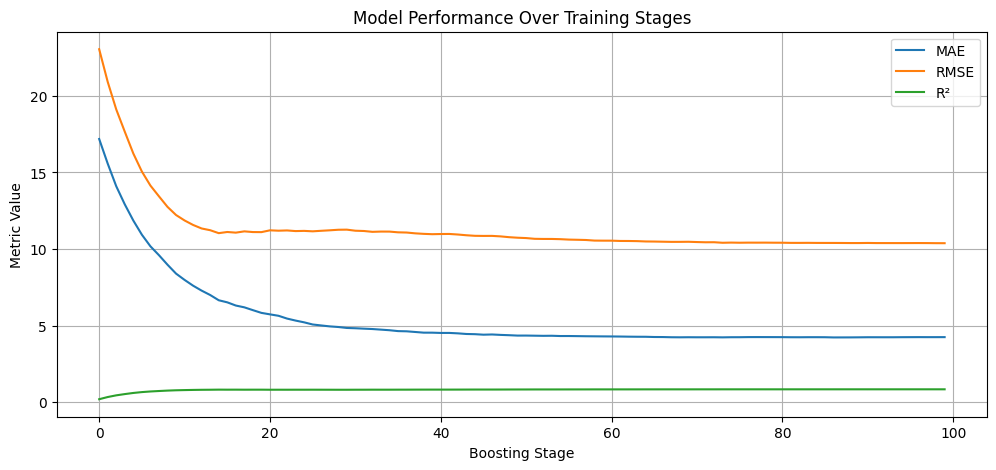

Final MAE: 4.2443
Final RMSE: 10.3811
Final R²: 0.8353


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Train model
model.fit(X_train, y_train)

# Track metrics over boosting iterations
mae_list = []
rmse_list = []
r2_list = []

# Extract the trained regressor from the pipeline
gbr = model.named_steps["regressor"]

for y_pred_stage in gbr.staged_predict(model.named_steps["preprocessor"].transform(X_test)):
    mae_list.append(mean_absolute_error(y_test, y_pred_stage))
    rmse_list.append(mean_squared_error(y_test, y_pred_stage) ** 0.5)
    r2_list.append(r2_score(y_test, y_pred_stage))

# Plot
plt.figure(figsize=(12,5))
plt.plot(mae_list, label="MAE")
plt.plot(rmse_list, label="RMSE")
plt.plot(r2_list, label="R²")
plt.xlabel("Boosting Stage")
plt.ylabel("Metric Value")
plt.title("Model Performance Over Training Stages")
plt.legend()
plt.grid(True)
plt.show()

# Final metrics
print(f"Final MAE: {mae_list[-1]:.4f}")
print(f"Final RMSE: {rmse_list[-1]:.4f}")
print(f"Final R²: {r2_list[-1]:.4f}")


# XGBOOST

In [11]:
!pip install xgboost

In [12]:
!pip install -U xgboost scikit-learn


In [1]:
# --- STEP 1: Imports ---
import re
import joblib
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- STEP 2: Load data ---
DATA_PATH = "/content/Copy of Power BI - Combined Route Analysis.xlsx"
df = pd.read_excel(DATA_PATH)
print("Dataset shape:", df.shape)

# --- STEP 3: Helpers ---
def parse_month_to_date(s):
    if pd.isna(s): return np.nan
    s = str(s).strip()
    for fmt in ("%b-%y", "%b-%Y", "%B-%y", "%B-%Y", "%m/%y", "%m/%Y", "%Y-%m", "%Y/%m", "%d-%b-%y", "%d-%b-%Y"):
        try:
            dt = datetime.strptime(s, fmt)
            if dt.year < 1980:  # fix 2-digit years
                dt = dt.replace(year=dt.year + 2000)
            return dt
        except:
            continue
    return np.nan

def percent_to_float(x):
    if pd.isna(x): return np.nan
    s = str(x).replace("%", "").strip()
    s = s.replace(",", "")
    try:
        return float(s)/100.0
    except:
        return np.nan

def coords_to_lat_lon(x):
    if pd.isna(x): return (np.nan, np.nan)
    m = re.match(r"\s*([+-]?\d+(?:\.\d+)?)\s*,\s*([+-]?\d+(?:\.\d+)?)", str(x))
    if m:
        return float(m.group(1)), float(m.group(2))
    return (np.nan, np.nan)

# --- STEP 4: Feature engineering ---
if "Month" in df.columns:
    df["Month_dt"] = df["Month"].apply(parse_month_to_date)
    # Filter out NaT values before accessing .dt accessor
    valid_month_dt = df["Month_dt"].dropna()
    if not valid_month_dt.empty:
        df["Month_num"] = pd.to_datetime(valid_month_dt).dt.month
        df["Year_num"] = pd.to_datetime(valid_month_dt).dt.year
    else:
         df["Month_num"] = np.nan
         df["Year_num"] = np.nan


# convert any % columns
for col in df.columns:
    if df[col].astype(str).str.contains("%").any():
        df[col + "_num"] = df[col].apply(percent_to_float)

# split coords into lat/lon when detected
for col in df.columns:
    sample_vals = df[col].dropna().astype(str)
    if len(sample_vals) and sample_vals.str.match(r"\s*[+-]?\d+(\.\d+)?,\s*[+-]?\d+(\.\d+)?").any():
        df[col + "_lat"] = df[col].apply(lambda v: coords_to_lat_lon(v)[0])
        df[col + "_lon"] = df[col].apply(lambda v: coords_to_lat_lon(v)[1])

# --- STEP 5: Target (Total storage days) ---
storage_cols = [c for c in ["DRC storage", "Zambia storage", "Load port storage"] if c in df.columns]
if len(storage_cols) == 0:
    raise ValueError("Couldn't find storage columns. Ensure DRC/Zambia/Load port storage columns exist.")
df["Total_storage_days"] = df[storage_cols].sum(axis=1)
df = df.dropna(subset=["Total_storage_days"])

# --- STEP 6: Train/test split & preprocessing ---
exclude_cols = ["Total_storage_days", "Month_dt"]
X = df.drop(columns=[c for c in exclude_cols if c in df.columns])
y = df["Total_storage_days"]

numeric_feats = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_feats = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_feats),
        ("cat", categorical_transformer, categorical_feats),
    ],
    remainder="drop"
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

Dataset shape: (273, 38)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['Month_num' 'Year_num']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: ['Month_num' 'Year_num']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [2]:
# --- STEP 7: XGBoost with per-round logs (epochs) ---
def major_version(v):
    try:
        return int(v.split(".")[0])
    except:
        return 2  # assume new

xgb_version_major = major_version(xgb.__version__)
print("XGBoost version:", xgb.__version__)

common_params = dict(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="hist",  # fast on CPU
)

eval_set = [(X_train_proc, y_train), (X_test_proc, y_test)]

XGBoost version: 1.5.0


In [15]:
!pip install xgboost==1.5.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.5/173.5 MB 4.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.0.4
    Uninstalling xgboost-3.0.4:
      Successfully uninstalled xgboost-3.0.4


In [ ]:
new_attrs = ['grow_policy', 'max_bin', 'eval_metric', 'callbacks', 'early_stopping_rounds', 'max_cat_to_onehot', 'max_leaves', 'sampling_method']

for attr in new_attrs:
    setattr(xgb_model, attr, None)

In [3]:


if xgb_version_major >= 2:
    # XGBoost 2.x: eval_metric in constructor + callbacks for logs & early stopping
    xgb_model = xgb.XGBRegressor(eval_metric="rmse", **common_params)
    callbacks = [
        xgb.callback.EvaluationMonitor(period=10),
        xgb.callback.EarlyStopping(rounds=50, save_best=True)
    ]
    xgb_model.fit(X_train_proc, y_train, eval_set=eval_set, callbacks=callbacks)
else:
    # XGBoost 1.x: eval_metric in fit, can use verbose for logs, early_stopping_rounds in fit
    xgb_model = xgb.XGBRegressor(**common_params)
    xgb_model.fit(
        X_train_proc, y_train,
        eval_set=eval_set,
        eval_metric="rmse",
        early_stopping_rounds=50,
        verbose=10
    )

# --- STEP 8: Metrics per boosting round (training epochs) ---


/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:75: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


[0]	validation_0-rmse:51.25253	validation_1-rmse:48.34477
[10]	validation_0-rmse:32.51720	validation_1-rmse:29.70850
[20]	validation_0-rmse:21.07932	validation_1-rmse:18.88705
[30]	validation_0-rmse:13.93280	validation_1-rmse:12.89492
[40]	validation_0-rmse:9.55147	validation_1-rmse:10.01024
[50]	validation_0-rmse:6.89989	validation_1-rmse:8.71638
[60]	validation_0-rmse:4.93628	validation_1-rmse:8.40783
[70]	validation_0-rmse:3.66359	validation_1-rmse:8.39590
[80]	validation_0-rmse:2.79057	validation_1-rmse:8.50848
[90]	validation_0-rmse:2.19043	validation_1-rmse:8.56522
[100]	validation_0-rmse:1.71187	validation_1-rmse:8.60651
[108]	validation_0-rmse:1.43600	validation_1-rmse:8.61271


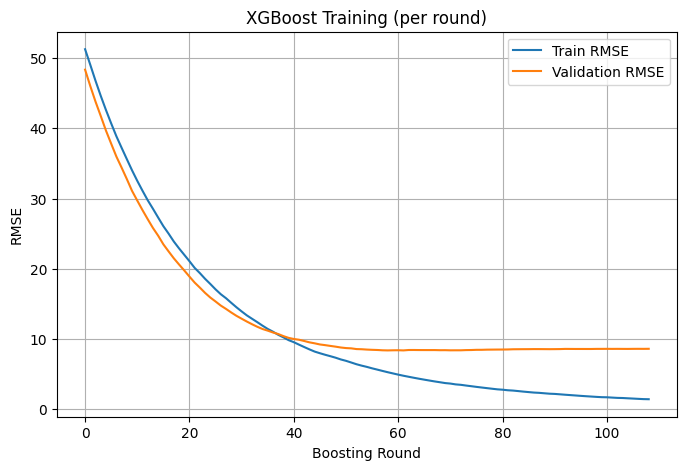

Final MAE:  4.6624
Final RMSE: 8.3824
Final R²:   0.8926


In [4]:
results = xgb_model.evals_result()
train_rmse = results["validation_0"]["rmse"]
val_rmse = results["validation_1"]["rmse"]

# Plot RMSE over boosting rounds
plt.figure(figsize=(8,5))
plt.plot(train_rmse, label="Train RMSE")
plt.plot(val_rmse, label="Validation RMSE")
plt.xlabel("Boosting Round")
plt.ylabel("RMSE")
plt.title("XGBoost Training (per round)")
plt.legend()
plt.grid(True)
plt.show()

# --- STEP 9: Final evaluation on test set ---
y_pred = xgb_model.predict(X_test_proc)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"Final MAE:  {mae:.4f}")
print(f"Final RMSE: {rmse:.4f}")
print(f"Final R²:   {r2:.4f}")



In [5]:
# Best iteration (when early stopping active)
best_iter = getattr(xgb_model, "best_iteration", None)
best_score = getattr(xgb_model, "best_score", None)
if best_iter is not None:
    print(f"Best iteration: {best_iter}")
if best_score is not None:
    print(f"Best validation RMSE: {best_score:.4f}")



Best iteration: 58
Best validation RMSE: 8.3824


In [6]:
# --- STEP 10: Save pipeline to Drive ---
joblib.dump((preprocessor, xgb_model), "/content/drive/MyDrive/xgb_storage_days.pkl")
print("Saved model to /content/drive/MyDrive/xgb_storage_days.pkl")

Saved model to /content/drive/MyDrive/xgb_storage_days.pkl
